# Import des ressources

In [1]:
import pandas as pd
import missingno
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection


#Supprime les avertissements
warnings.simplefilter(action='ignore', category=FutureWarning) #supprime les FutureWarnings dû à l'utilisation de pandas (.append/.drop)
pd.options.mode.chained_assignment = None  # default='warn'

# Import de la data

In [2]:
df_data = pd.read_csv("E:/bazar/Work/Work_OpenClassroom/Projet 3/fr.openfoodfacts.org.products.csv", sep='\t', low_memory=False)  # fichier data

# Fonctions

## Fonctions de base

In [3]:
def cellules_manquantes_pourcentage(data):
    #Permet d'avoir un % de cellules manquantes
    return data.isna().sum().sum()/(data.size)

## Fonctions sur les dataframes

In [4]:
def supprimer_variables_peu_utilisables(data, condition): # 'nom' à améliorer
# Permet de supprimer les variables qui ont un nombre de données manquantes important. On calcule en fonction d'un % (condition)
    data_filtree = pd.DataFrame()
    data_filtree = data
    for column in data.columns: #on boucle sur chaque colonne de la Dataframe
        var_type = data[column].dtypes #on check le type de la colonne
        pourcentage_valeur_manquantes = cellules_manquantes_pourcentage(data[column])  #% de données manquant
        if var_type == 'float64' and float(pourcentage_valeur_manquantes) > condition: # si le type n'est pas float, ça ne peut pas marcher.
            data_filtree.drop(column, axis=1, inplace=True) #on drop l'intégralité de la colonne si le % manquant dépasse la condition...
            print(f'La colonne {column} , avec {pourcentage_valeur_manquantes*100} % de données manquantes de la Dataframe est supprimée')
    return data_filtree


def delete_outliers_nutrition(data, columns):
# Les colonnes nutrition sont pour 100g. Il ne peut donc, ni y avoir valeur négative, ni valeur au-dessus de 100g
# where supprime les valeurs où la condition est fausse
    for col in columns: 
        data.loc[:,col] = data[col].where(data[col] >= 0)
        data.loc[:,col] = data[col].where(data[col] <= 100)
    return(data)


## Fonctions graphiques

In [5]:
def boxplot_nutrition(df, colonnes, x):
    for colonnes in colonnes:
        plt.figure(figsize=(15,10))
        sns.boxplot(x=x,
            y=colonnes,  
                    data=df).set_title(colonnes)
        plt.show()


# Pré-analyse

## Qualité des données

In [6]:
pd.set_option("display.max_columns", 500)
df_data.head(5)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

### Valeurs manquantes

<AxesSubplot:>

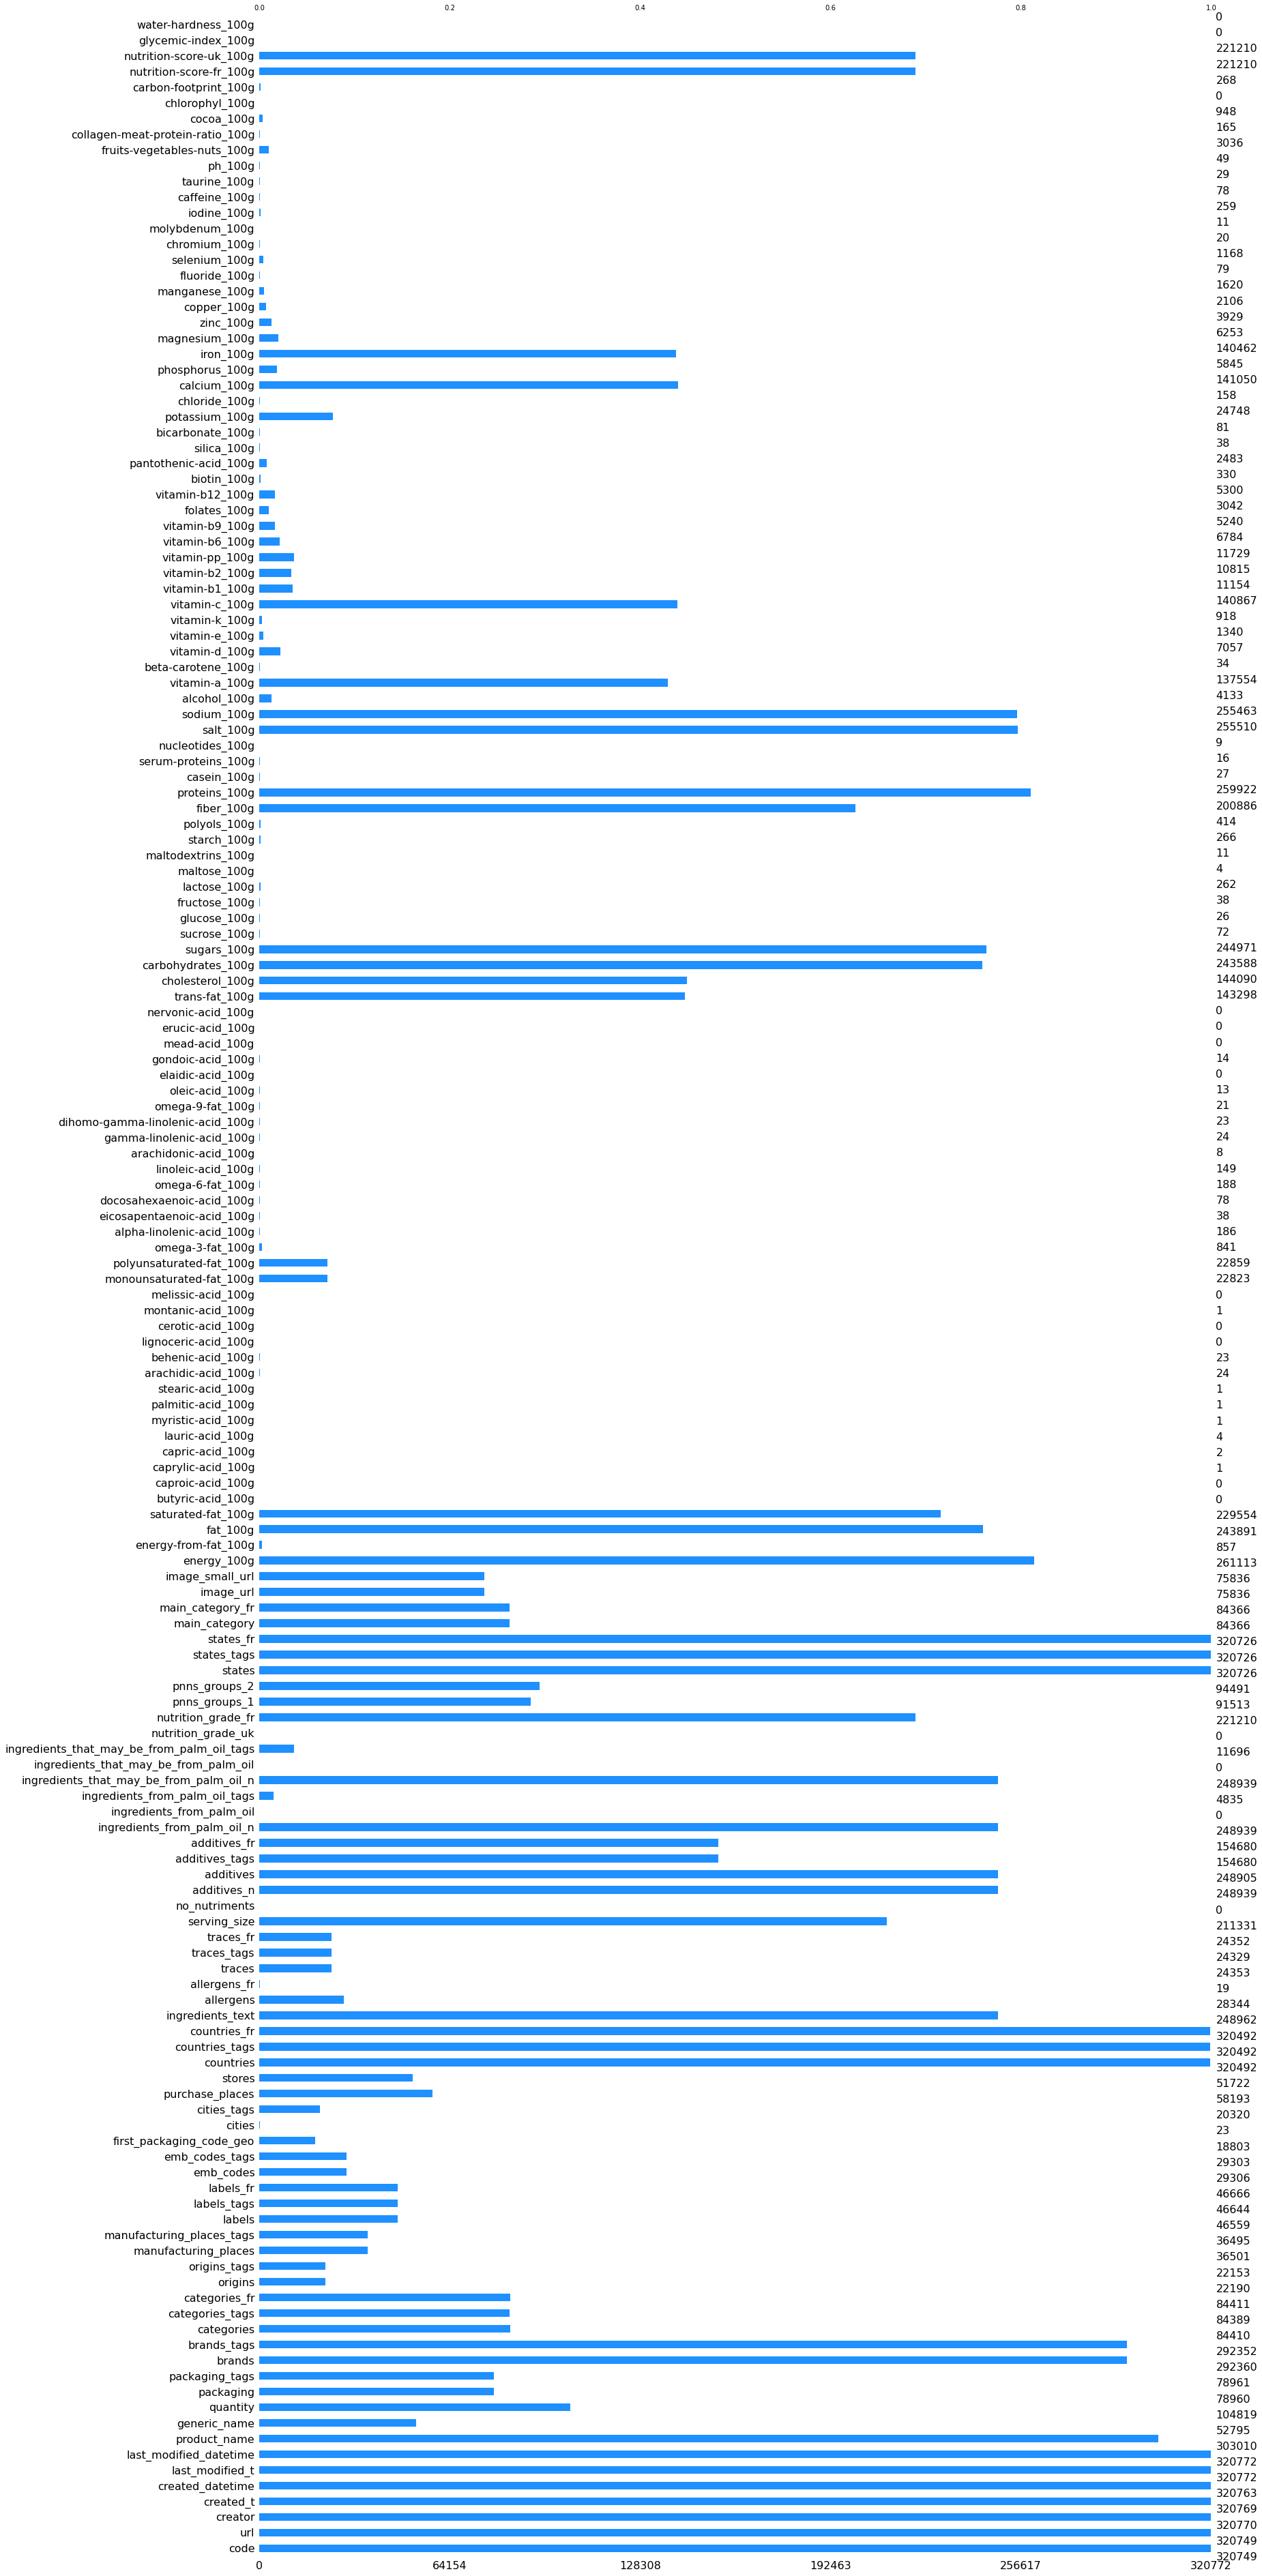

In [7]:
missingno.bar(df_data, color='dodgerblue') 

### Valeurs en doublon
#### Vue générale
Existe-il des lignes en doublon ?

In [8]:
print(df_data.loc[df_data.duplicated(keep=False),:]) #.duplicated -> Return boolean Series denoting duplicate rows.

Empty DataFrame
Columns: [code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, generic_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_fr, origins, origins_tags, manufacturing_places, manufacturing_places_tags, labels, labels_tags, labels_fr, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, purchase_places, stores, countries, countries_tags, countries_fr, ingredients_text, allergens, allergens_fr, traces, traces_tags, traces_fr, serving_size, no_nutriments, additives_n, additives, additives_tags, additives_fr, ingredients_from_palm_oil_n, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_fr, main_category, main_category_fr, image

<span class="girk">Pas de doublon</span>

#### Vue par produit
Existe-t-il des produits en doublon ?

In [9]:
df_data[df_data.duplicated(subset=['product_name'])]


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
152,0000000045599,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489050423,2017-03-09T09:07:03Z,1489050423,2017-03-09T09:07:03Z,Peanuts,NaN,NaN,NaN,NaN,Northgate,northgate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),NaN,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.25000,NaN,0.000000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
183,0000007020254,http://world-fr.openfoodfacts.org/produit/0000...,teolemon,1420150193,2015-01-01T22:09:53Z,1420210373,2015-01-02T14:52:53Z,NaN,NaN,NaN,NaN,NaN,A&W,a-w,Root bier,fr:root-bier,Root-bier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN

Il en existe. On va donc les supprimer dans le nettoyage des données

## Informations sur le jeu de données

La dimension du tableau :

In [10]:
df_data.shape

# Nouvelle version de l'exo : 2M avec la précédente version - 320k avec celle-ci

(320772, 162)

In [11]:
df_data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

In [12]:
df_data['fat_100g'].describe()

count    243891.000000
mean         12.730379
std          17.578747
min           0.000000
25%           0.000000
50%           5.000000
75%          20.000000
max         714.290000
Name: fat_100g, dtype: float64

In [13]:
df_data['proteins_100g'].describe()

count    259922.000000
mean          7.075940
std           8.409054
min        -800.000000
25%           0.700000
50%           4.760000
75%          10.000000
max         430.000000
Name: proteins_100g, dtype: float64

<span class="mark">On peut voir des valeurs aberrantes</span> : Par exemple, le max pour fat_100g est de 714g, ce qui n'est pas possible.
<span class="mark">Il y a également des valeurs négatives</span>

### Produits
Combien de produits uniques ?

In [14]:
df_data['product_name'].nunique()

221347

### Pays
Combien de pays ?

In [15]:
df_data['countries_fr'].nunique()


722

In [16]:
df_data['countries_fr'].unique()

array(['France', 'États-Unis', 'Royaume-Uni', 'France,États-Unis',
       'Canada', 'Suisse', 'Espagne', 'Allemagne', 'Slovénie', 'Italie',
       'Roumanie', 'Australie', 'Portugal', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Guadeloupe', nan,
       'Royaume-Uni,États-Unis', 'Canada,États-Unis', 'Pays-Bas',
       'Australie,France', 'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'Irlande', 'France,La Réunion',
       'Taiwan', 'Australie,Suisse', 'France,Allemagne', 'Brésil',
       'Belgique,France', 'République dominicaine',
       'États-Unis,en:Australie', 'Arabie saoudite',
       'Émirats arabes unis', 'Irak', 'Koweït', 'Moldavie', 'Belgique',
       'Nouvelle-Calédonie', 'Singapour', 'Finlande',
       'Australie,États-Unis', 'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Polynésie française', 'Panama', 'Costa Rica', 'Mexique',
       'États-Unis,en:Pays-bas', 'Espagne,Royau

### Catégories

In [17]:
df_data['categories'].nunique()

36982

### Brands

In [18]:
df_data['brands'].nunique()

58784

# Nettoyage des données

## Suppression colonnes inutiles

In [19]:
df_data_clean = supprimer_variables_peu_utilisables(df_data, 0.80) #plus de 80% données manquantes => supprimés

df_data_clean

La colonne no_nutriments , avec 100.0 % de données manquantes de la Dataframe est supprimée
La colonne ingredients_from_palm_oil , avec 100.0 % de données manquantes de la Dataframe est supprimée
La colonne ingredients_that_may_be_from_palm_oil , avec 100.0 % de données manquantes de la Dataframe est supprimée
La colonne nutrition_grade_uk , avec 100.0 % de données manquantes de la Dataframe est supprimée
La colonne energy-from-fat_100g , avec 99.732832042697 % de données manquantes de la Dataframe est supprimée
La colonne butyric-acid_100g , avec 100.0 % de données manquantes de la Dataframe est supprimée
La colonne caproic-acid_100g , avec 100.0 % de données manquantes de la Dataframe est supprimée
La colonne caprylic-acid_100g , avec 99.99968825209183 % de données manquantes de la Dataframe est supprimée
La colonne capric-acid_100g , avec 99.99937650418366 % de données manquantes de la Dataframe est supprimée
La colonne lauric-acid_100g , avec 99.99875300836732 % de données manquant

La colonne ph_100g , avec 99.9847243524996 % de données manquantes de la Dataframe est supprimée
La colonne fruits-vegetables-nuts_100g , avec 99.05353335079121 % de données manquantes de la Dataframe est supprimée
La colonne collagen-meat-protein-ratio_100g , avec 99.9485615951517 % de données manquantes de la Dataframe est supprimée
La colonne cocoa_100g , avec 99.70446298305339 % de données manquantes de la Dataframe est supprimée
La colonne chlorophyl_100g , avec 100.0 % de données manquantes de la Dataframe est supprimée
La colonne carbon-footprint_100g , avec 99.91645156061003 % de données manquantes de la Dataframe est supprimée
La colonne glycemic-index_100g , avec 100.0 % de données manquantes de la Dataframe est supprimée
La colonne water-hardness_100g , avec 100.0 % de données manquantes de la Dataframe est supprimée


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,NaN,0.0,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,NaN,28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/000

<AxesSubplot:>

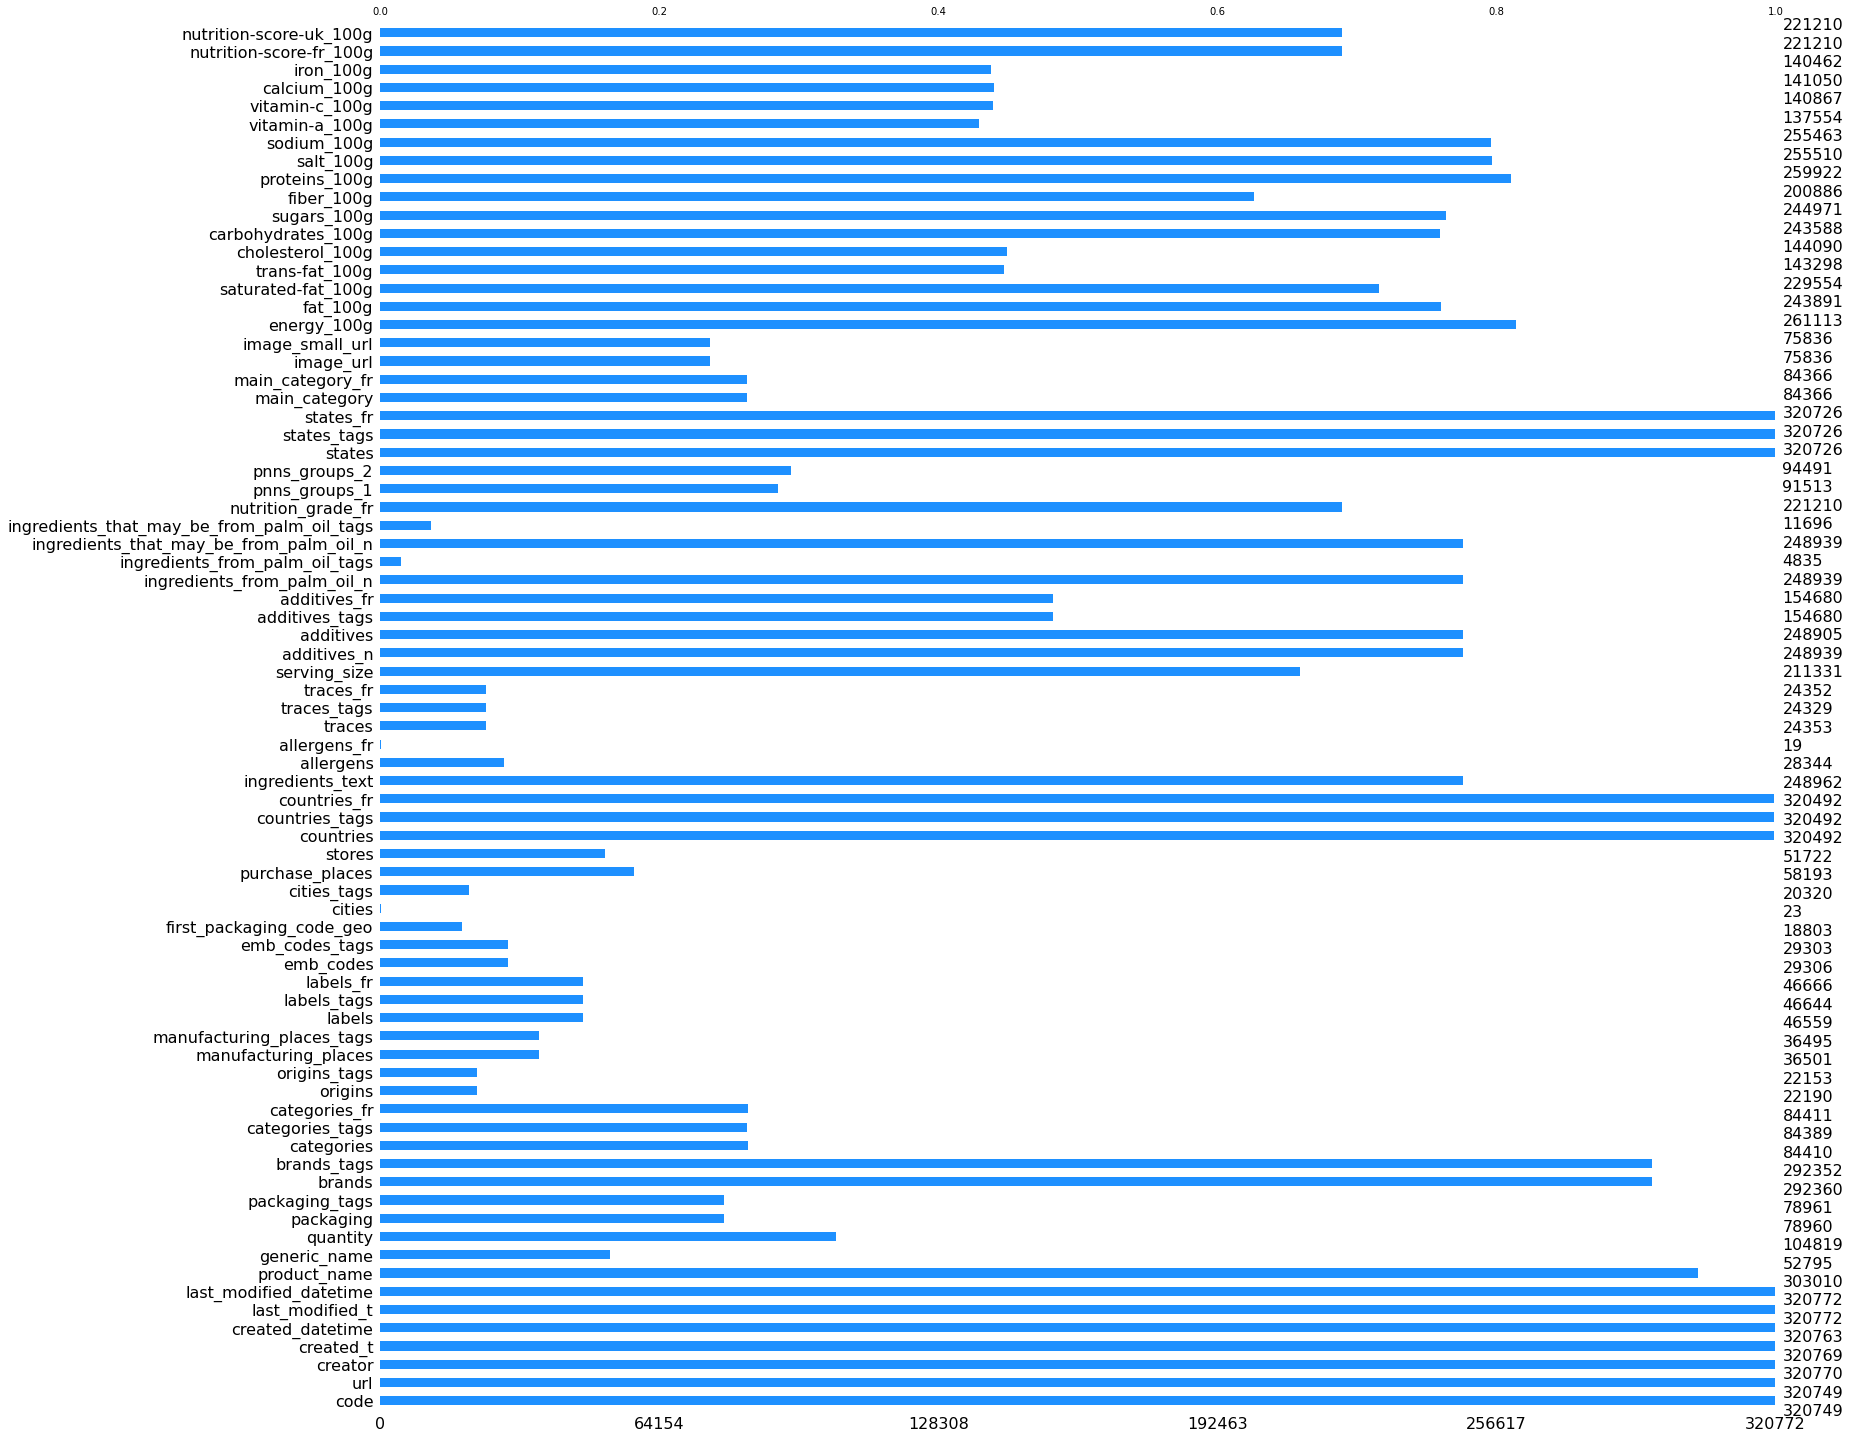

In [20]:
missingno.bar(df_data_clean, color='dodgerblue') 


In [21]:
#Arbitrairement :
colonnes_à_supprimer = ['cities', 'cities_tags', 'allergens_fr', 'generic_name']
df_data_clean.drop(columns=colonnes_à_supprimer, inplace=True)

df_data_clean.columns #colonnes restantes

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'origins', 'origins_tags',
       'manufacturing_places', 'manufacturing_places_tags', 'labels',
       'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags',
       'first_packaging_code_geo', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives_n',
       'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_c

## Suppression outliers
On isole les colonnes qui concernent les valeurs nutritionnelles (100g)

In [22]:
colonnes_nutrition = df_data_clean.filter(regex='_100g') #colonnes qui contiennent 100g
colonnes_nutrition_sans_energie = colonnes_nutrition.drop(['energy_100g'], axis=1) #la colonne energy est différente des valeurs nutritionnelles
colonnes_nutrition = colonnes_nutrition.columns #on ne cherche que les noms des colonnes, pas leurs valeurs/variables
colonnes_nutrition_sans_energie = colonnes_nutrition_sans_energie.columns
colonnes_nutrition


Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

### Distribution avant suppression

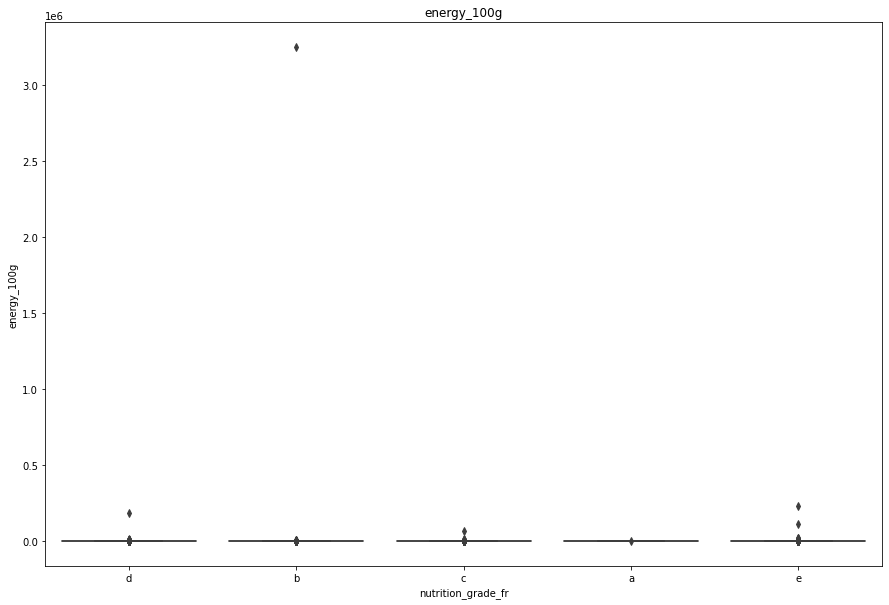

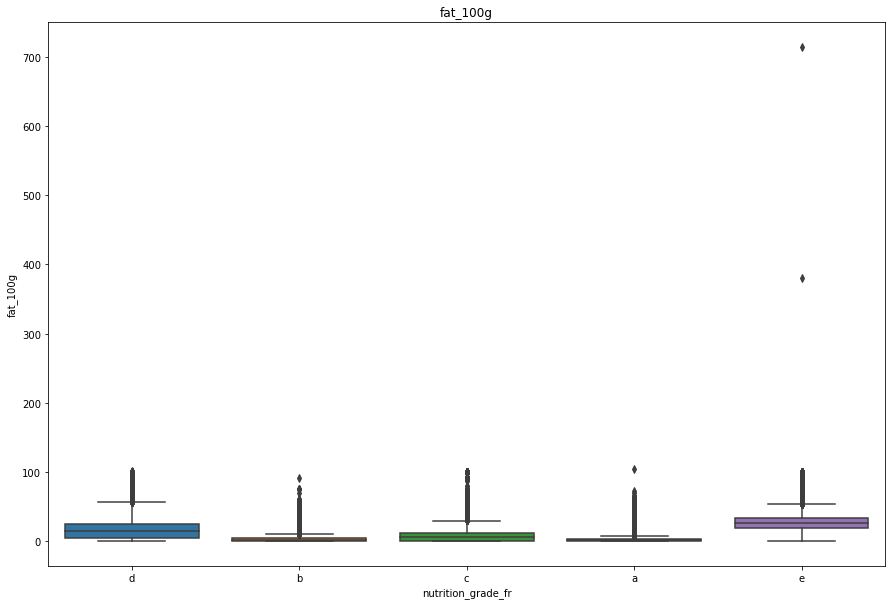

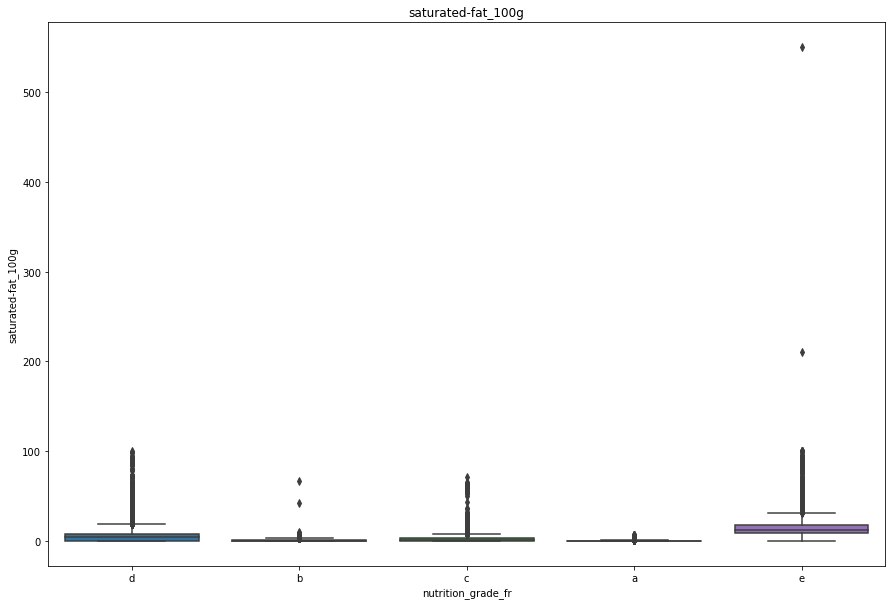

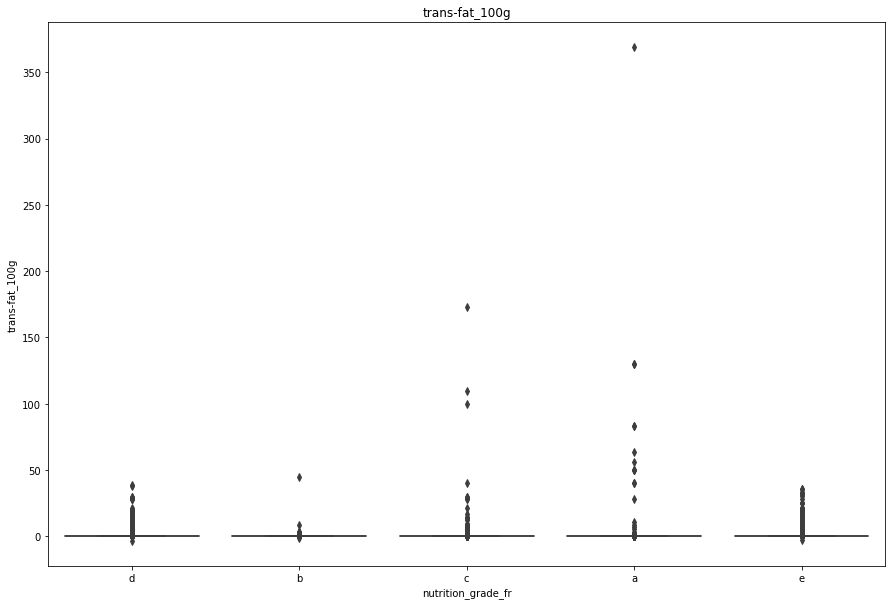

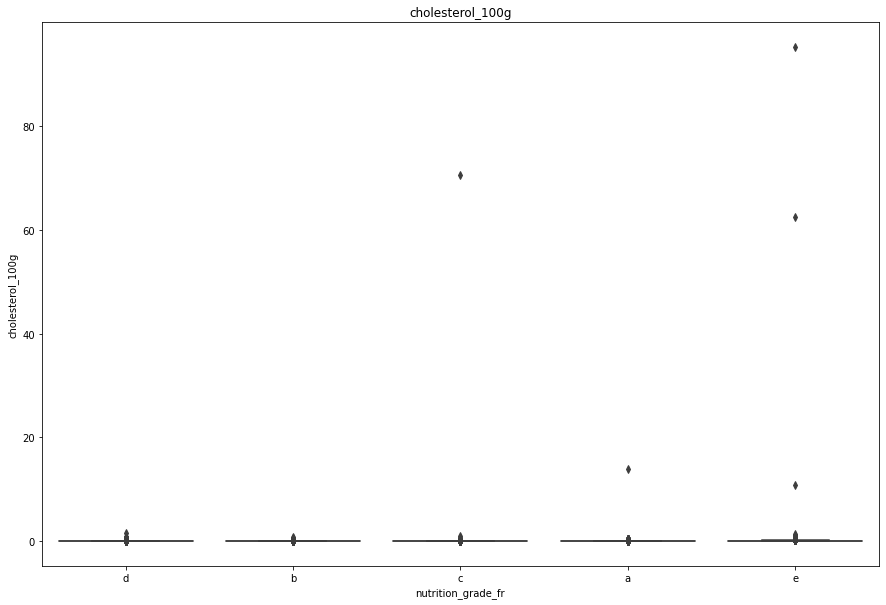

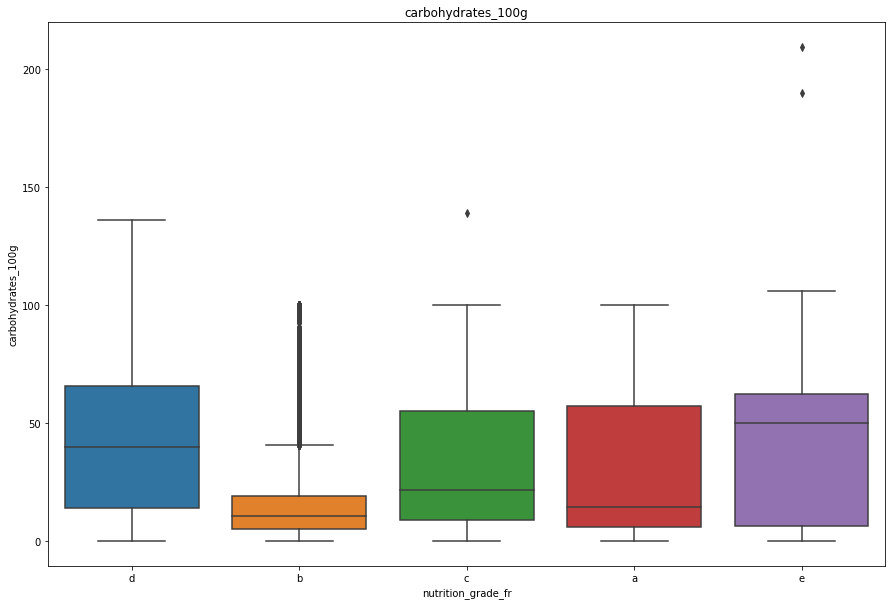

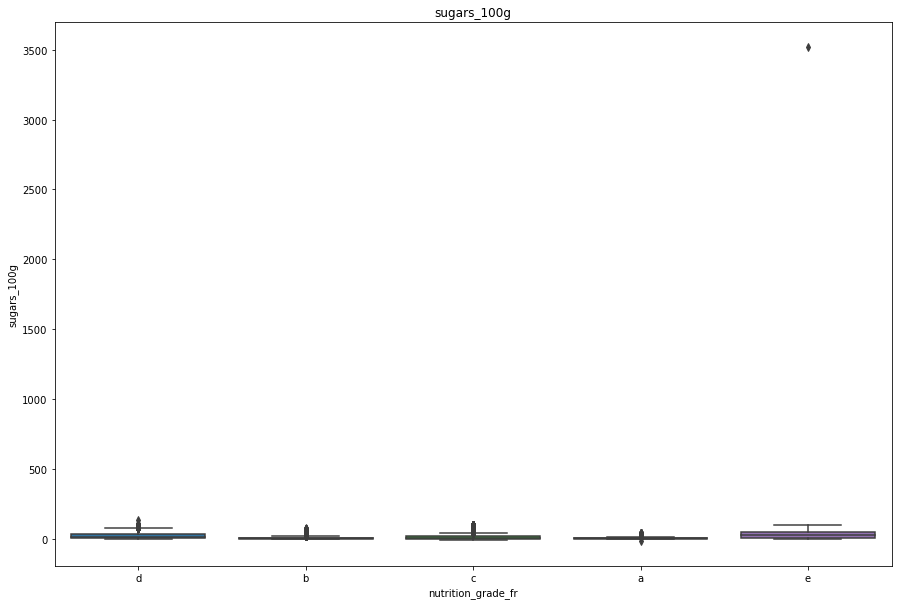

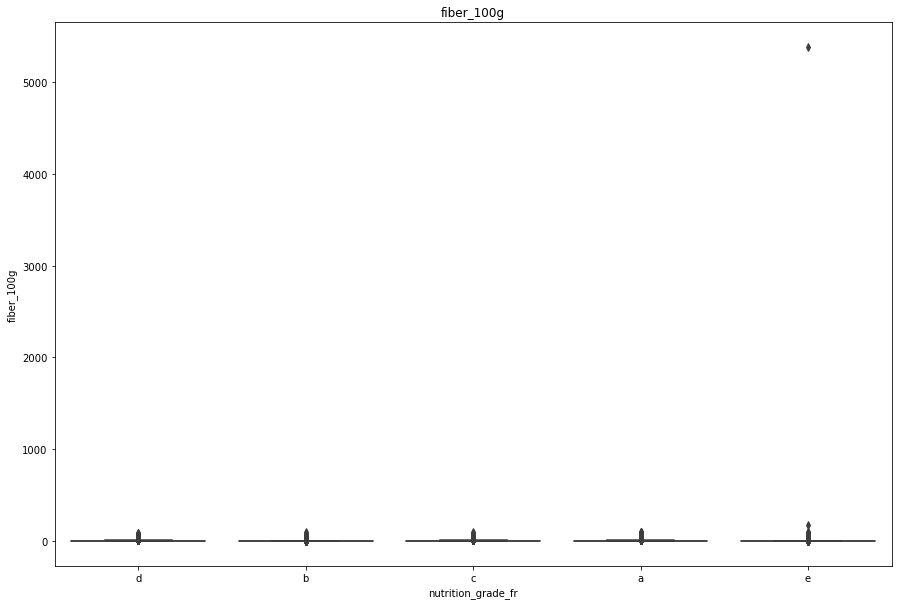

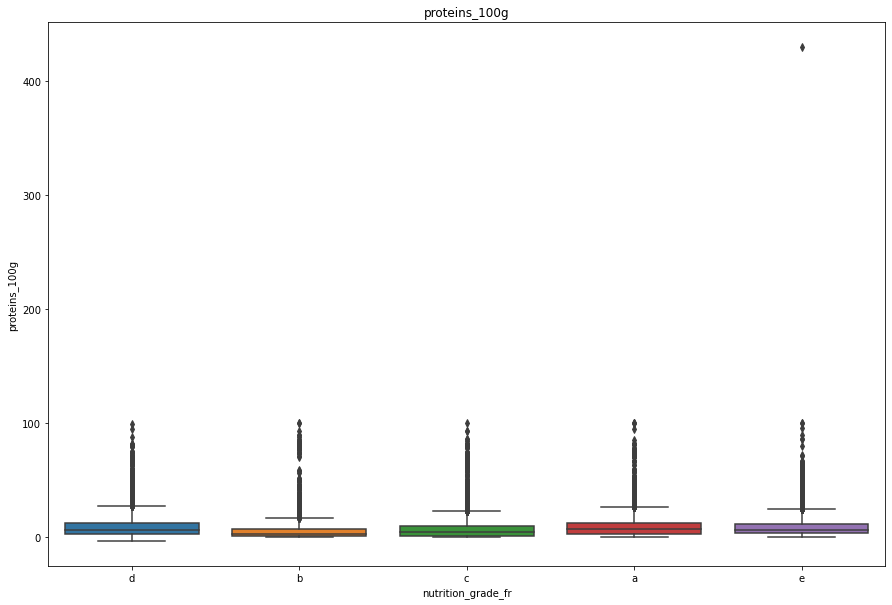

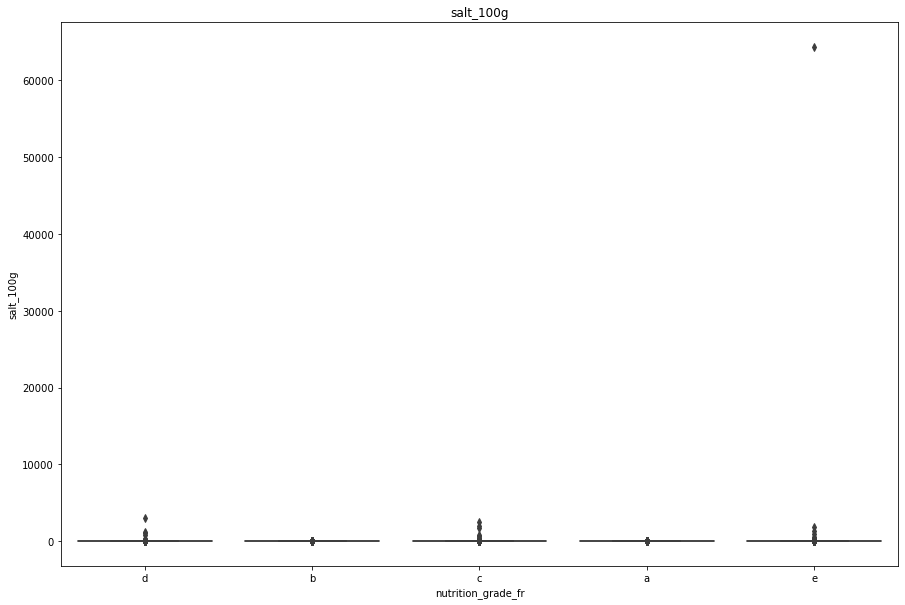

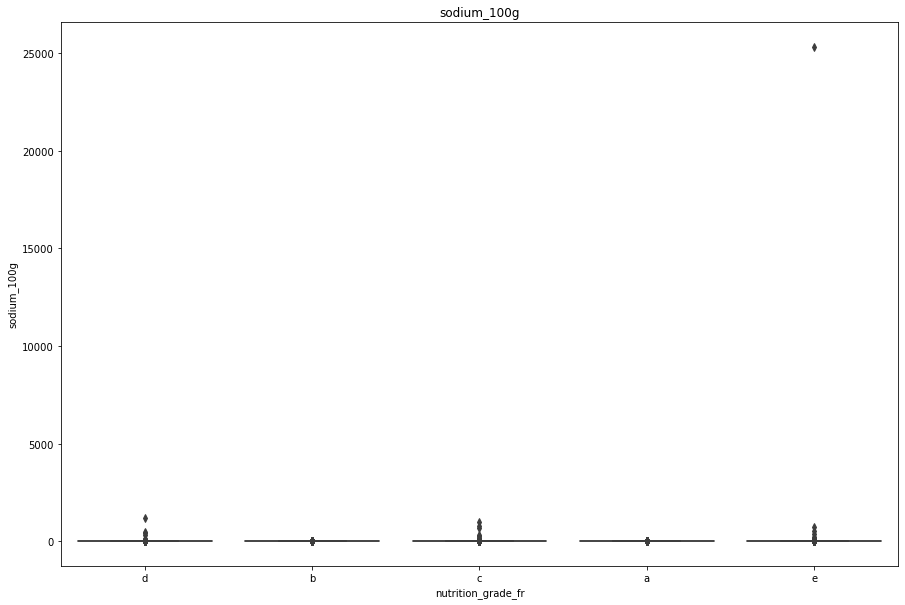

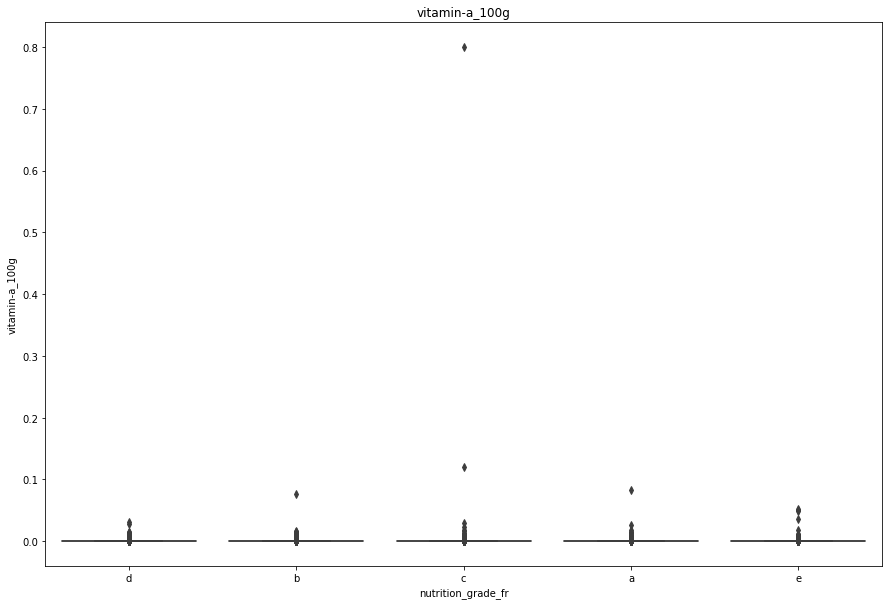

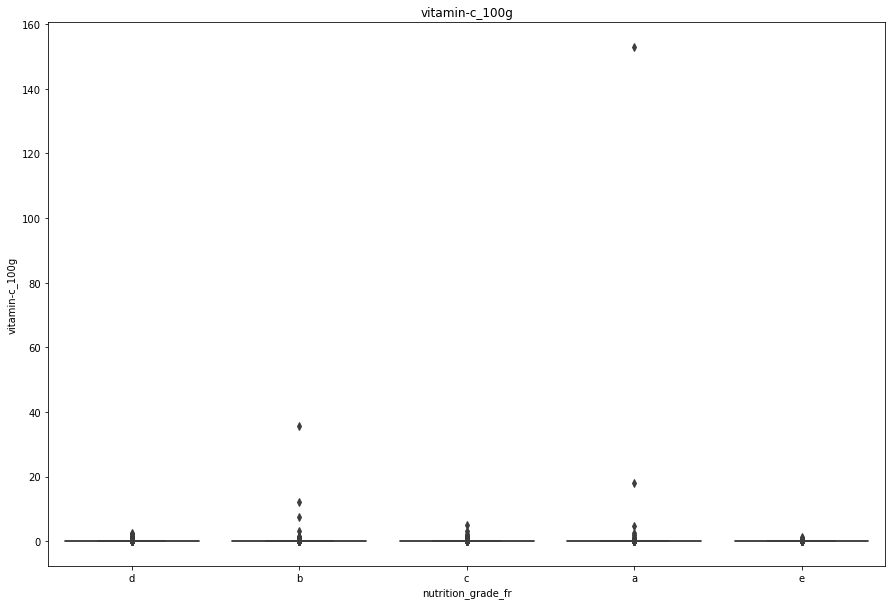

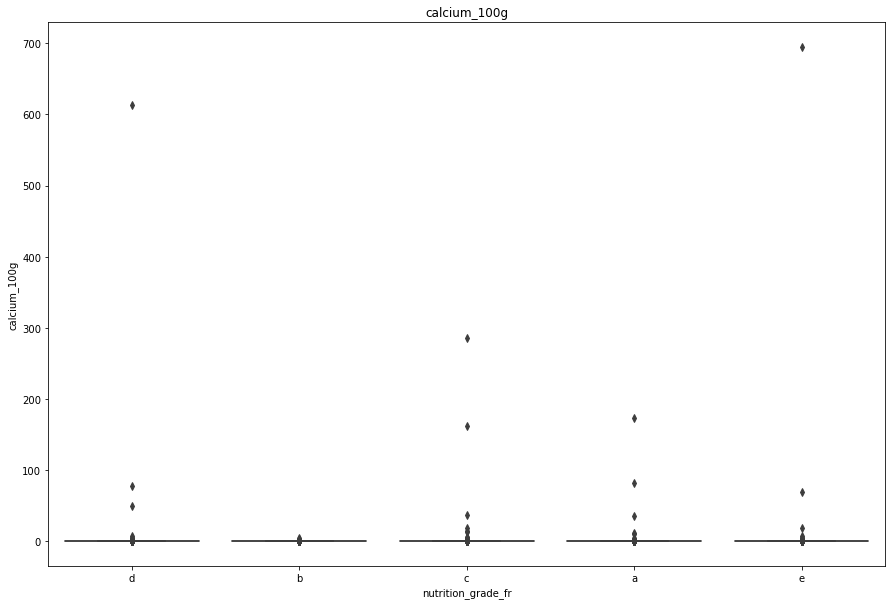

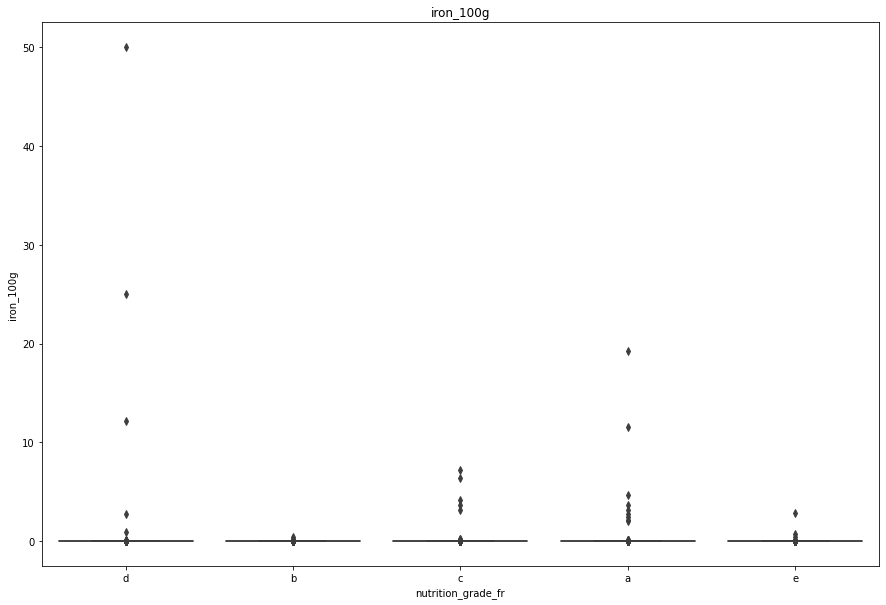

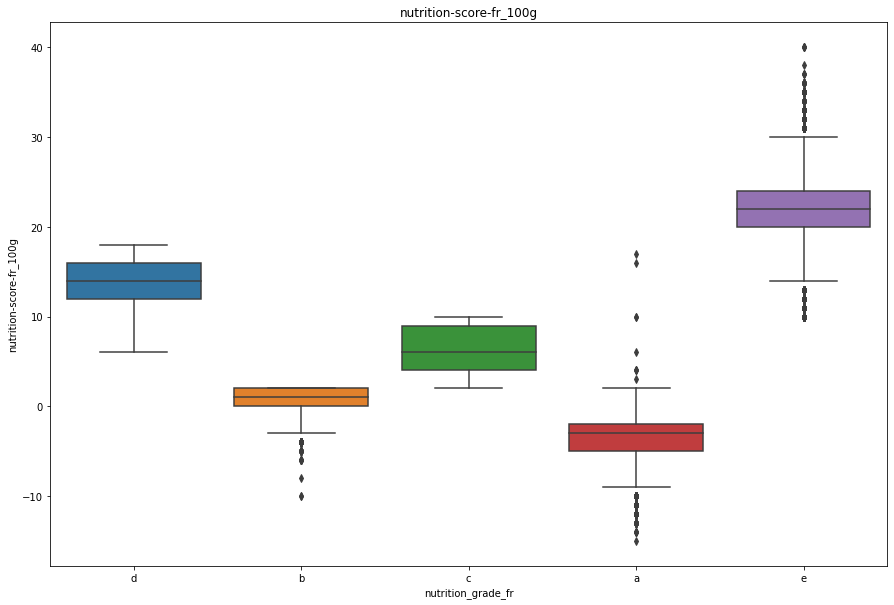

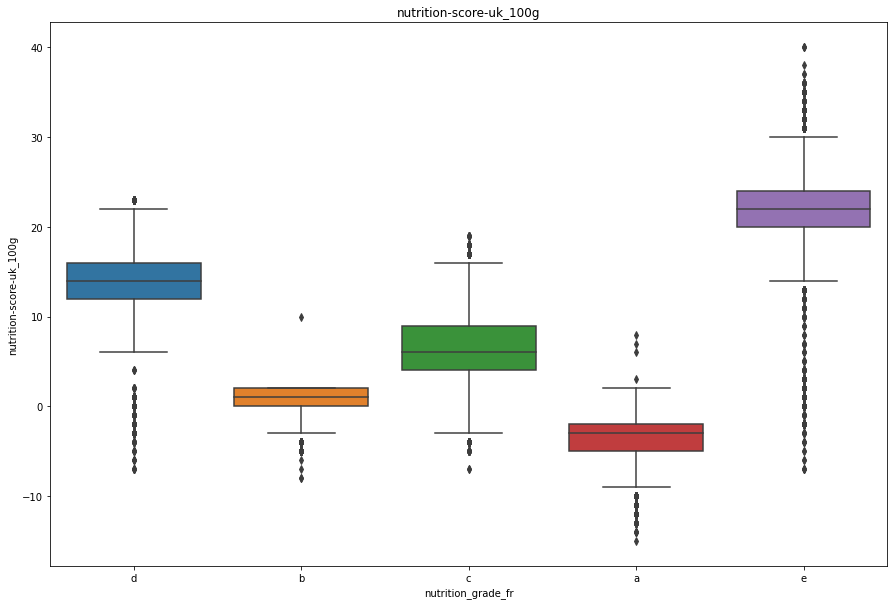

In [23]:
#for colonnes in colonnes_nutrition:
#    plt.figure(figsize=(15,10))
#    sns.boxplot(x='nutrition_grade_fr', y=colonnes,  
#                data=df_data_clean).set_title(colonnes)
#    plt.show()
    
boxplot_nutrition(df_data_clean, colonnes_nutrition, 'nutrition_grade_fr')    
    
# Au départ, je ne l'avais fait qu'avec l'axe y... mais les boxplot ne donnaient pas de représentation vraiment pertinente.
# Etant donné que je travaille sur le nutriscore, il me semblait cohérent de les rajouter dans l'axe

### Valeurs aberrantes
Nous avons vu précédemment qu'il y avait des valeurs aberrantes, notamment pour la colonne fat_100g.

Le describe() le montrait déjà, mais les botplox le mettent clairement en évidence....

In [24]:
df_data_clean = delete_outliers_nutrition(df_data_clean, colonnes_nutrition_sans_energie)

df_data_clean

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,NaN,NaN,28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,NaN,0.0,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,NaN,NaN,28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,

In [25]:
df_data_clean.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939.000000,248939.000000,248939.000000,2.611130e+05,243887.000000,229551.000000,143289.000000,144090.000000,243569.000000,244952.000000,200881.000000,259918.000000,255352.000000,255429.000000,137553.000000,140863.000000,141040.000000,140461.000000,185504.000000,183849.000000
mean,1.936024,0.019659,0.055246,1.141915e+03,12.725256,5.125925,0.067172,0.020071,32.055323,15.985449,2.832473,7.079409,1.588497,0.647145,0.000397,0.014563,0.102023,0.003653,11.587324,11.592127
std,2.502019,0.140524,0.269207,6.447154e+03,17.503695,7.913684,0.945020,0.358062,29.140680,21.165362,4.588272,8.156552,6.242531,2.656343,0.073279,0.461423,0.585288,0.214409,7.783573,7.909983
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.770000e+02,0.000000,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000
50%,1.000000,0.000000,0.000000,1.100000e+03,5.000000,1.790000,0.000000,0.000000,20.600000,5.710000,1.500000,4.760000,0.580000,0.229000,0.000000,0.000000,0.035000,0.001010,12.000000,12.000000
75%,3.000000,0.000000,0.000000,1.674000e+03,20.000000,7.140000,0.000000,0.020000,58.330000,24.000000,3.600000,10.000000,1.371600,0.541000,0.000107,0.003700,0.106000,0.002400,18.000000,18.000000
max,31.000000,2.000000,6.000000,3.251373e+06,100.000000,100.000000,100.000000,95.238000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,26.700000,100.000000,99.006000,50.000000,40.000000,40.000000


In [26]:
df_data_clean['sugars_100g'].describe()

count    244952.000000
mean         15.985449
std          21.165362
min           0.000000
25%           1.300000
50%           5.710000
75%          24.000000
max         100.000000
Name: sugars_100g, dtype: float64

<span class="girk">On voit bien dans la ligne "max" que les valeurs aberrantes ont disparu</span>
En revanche, les valeurs pour l'énergie sont toujours beaucoup trop élevés.

In [27]:
df_data_clean[df_data_clean['energy_100g'] > 10000]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
20070,0023545202883,http://world-fr.openfoodfacts.org/produit/0023...,usda-ndb-import,1489066863,2017-03-09T13:41:03Z,1489066863,2017-03-09T13:41:03Z,Bread Mix,NaN,NaN,NaN,La Fe,la-fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Corn flour, yucca starch, sugar, salt.",NaN,NaN,NaN,NaN,14 g (14 g),0.0,[ corn-flour -> en:corn-flour ] [ flour -> ...,NaN,NaN,0.0,NaN,0.0,NaN,e,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,10757.0,0.00,0.00,0.0,0.000,NaN,14.29,0.0,0.00,5.62356,2.214000,0.000000,0.0,0.000,0.00000,23.0,23.0
35308,0038233241334,http://world-fr.openfoodfacts.org/produit/0038...,usda-ndb-import,1489138749,2017-03-10T09:39:09Z,1489138749,2017-03-10T09:39:09Z,Lemon Cake,NaN,NaN,NaN,Coffee Baking Co,coffee-baking-co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Enriched flour (flour, reduced iron, thiamin m...",NaN,NaN,NaN,NaN,57 g (57 GRM),1.0,[ enriched-flour -> en:enriched-flour ] [ f...,en:e101,E101 - Riboflavine,0.0,NaN,0.0,NaN,e,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,13213.0,12.28,2.63,0.0,0.053,45.61,29.82,0.0,3.51,0.71374,0.281000,0.000053,0.0,0.035,0.00126,21.0,21.0
46967,0041390030512,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,1489065613,2017-03-09T13:20:13Z,1489065613,2017-03-09T13:20:13Z,Instant Aka Miso Soup,NaN,NaN,NaN,Kikkoman,kikkoman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Red miso powder(soybeans, rice salt), dehydrat...",NaN,NaN,NaN,NaN,10 g (10 g),4.0,[ red-miso-powder -> en:red-miso-powder ] [...,"en:e621,en:e508,en:e627,en:e327","E621 - Glutamate monosodique,E508 - Chlorure d...",0.0,NaN,0.0,NaN,e,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,14644.0,10.00,0.00,0.0,0.000,40.00,0.00,0.0,20.00,20.06600,7.900000,0.000000,0.0,0.000,0.00000,20.0,20.0
66156,0056141003103,http://world-fr.openfoodfacts.org/produit/0056...,usda-ndb-import,1489137075,2017-03-10T09:11:15Z,1489137076,2017-03-10T09:11:16Z,"Crema Salvadorena, Soft Blend Dairy Spread",NaN,NaN,NaN,Dona Kenia,dona-kenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Cultured pasteurized grade a cream and milk, n...",NaN,NaN,NaN,NaN,29 g (2 Tbsp),2.0,[ cultured-pasteurized-grade-a-cream-and-milk...,"en:e339iii,en:e407","E339iii - Phosphate de sodium tribasique,E407 ...",0.0,NaN,0.0,NaN,e,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informatio

Certaines valeurs au-dessus de 10k peuvent avoir du sens... comme l'huile.

In [28]:
# On supprime les lignes qui sont vraiment trop éloignés en terme d'energie_100g
df_data_clean[df_data_clean['energy_100g'] > 50000]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
112681,0201203040026,http://world-fr.openfoodfacts.org/produit/0201...,usda-ndb-import,1489053489,2017-03-09T09:58:09Z,1489053489,2017-03-09T09:58:09Z,Premium Extra Virgin Olive Oil,NaN,NaN,NaN,Eliki,eliki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,Extra virgin olive oil.,NaN,NaN,NaN,NaN,14 g (1 Tbsp),0.0,[ extra-virgin-olive-oil -> en:extra-virgin-o...,NaN,NaN,0.0,NaN,0.0,NaN,e,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,110579.0,NaN,100.00,0.0,0.0,NaN,0.0,0.0,0.00,0.00000,0.000000,NaN,NaN,NaN,NaN,20.0,20.0
119184,0619309100979,http://world-fr.openfoodfacts.org/produit/0619...,usda-ndb-import,1489073639,2017-03-09T15:33:59Z,1489073639,2017-03-09T15:33:59Z,"Sophia, Italian Drink, Squeezed Lime",NaN,NaN,NaN,Sophia Foods Inc.,sophia-foods-inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Water, lime juice, acidificant; citric acid, n...",NaN,NaN,NaN,NaN,5 ml (1 tsp),1.0,[ water -> en:water ] [ lime-juice -> en:li...,en:e330,E330 - Acide citrique,0.0,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,94140.0,0.0,0.00,0.0,0.0,0.3,0.0,0.0,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212928,3257983143096,http://world-fr.openfoodfacts.org/produit/3257...,openfoodfacts-contributors,1465029086,2016-06-04T08:31:26Z,1491931658,2017-04-11T17:27:38Z,Pois cassés,500 g,"Etui,Carton","etui,carton",Cora,cora,Pois cassés,fr:pois-casses,Pois-casses,NaN,NaN,NaN,NaN,Point Vert,en:green-dot,Point Vert,EMB 43062A,emb-43062a,"45.066667,3.733333",NaN,NaN,France,en:france,France,Pois cassés.,NaN,Gluten,en:gluten,Gluten,80 g,0.0,[ pois-casses -> fr:pois-casses ] [ pois ->...,NaN,NaN,0.0,NaN,0.0,NaN,b,unknown,unknown,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",fr:pois-casses,Pois-casses,NaN,NaN,3251373.0,1.2,0.20,NaN,NaN,48.2,2.5,15.4,22.70,0.01000,0.003937,NaN,NaN,NaN,NaN,0.0,0.0
219302,3270160689774,http://world-fr.openfoodfacts.org/produit/3270...,openfoodfacts-contributors,1461063386,2016-04-19T10:56:26Z,1488215252,2017-02-27T17:07:32Z,NaN,150 g,NaN,NaN,Picard,picard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,150 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,http://fr.openfoodfacts.org/images/products/32...,http://fr.openfoodfacts.org/images/products/32...,69292.0,0.5,0.01,NaN,NaN,14.8,11.5,3.4,0.80,0.01000,0.003937,NaN,NaN,NaN,Na

In [29]:
df_data_clean.drop(df_data_clean[df_data_clean['energy_100g'] > 50000].index, inplace=True)
df_data_clean[df_data_clean['energy_100g'] > 50000]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g


## Distribution après suppression

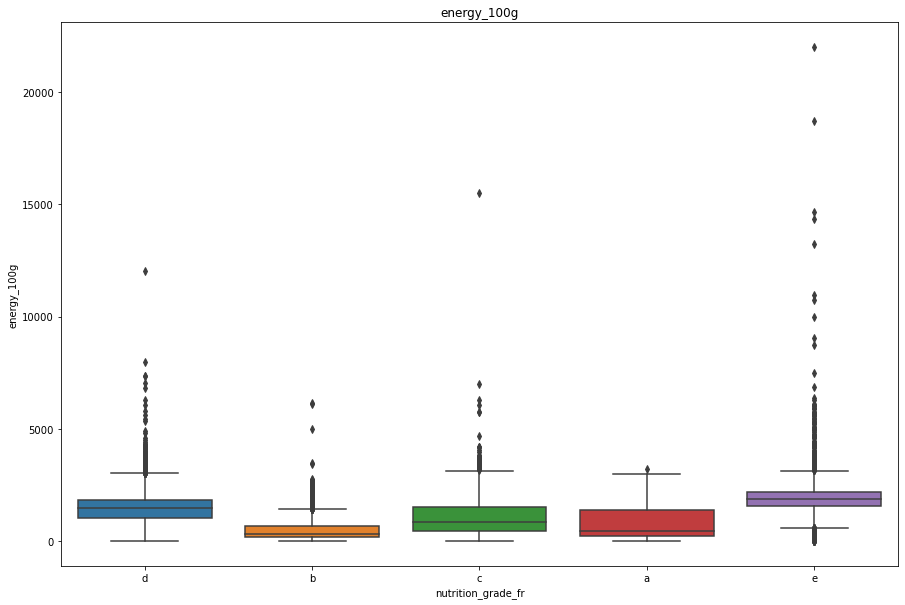

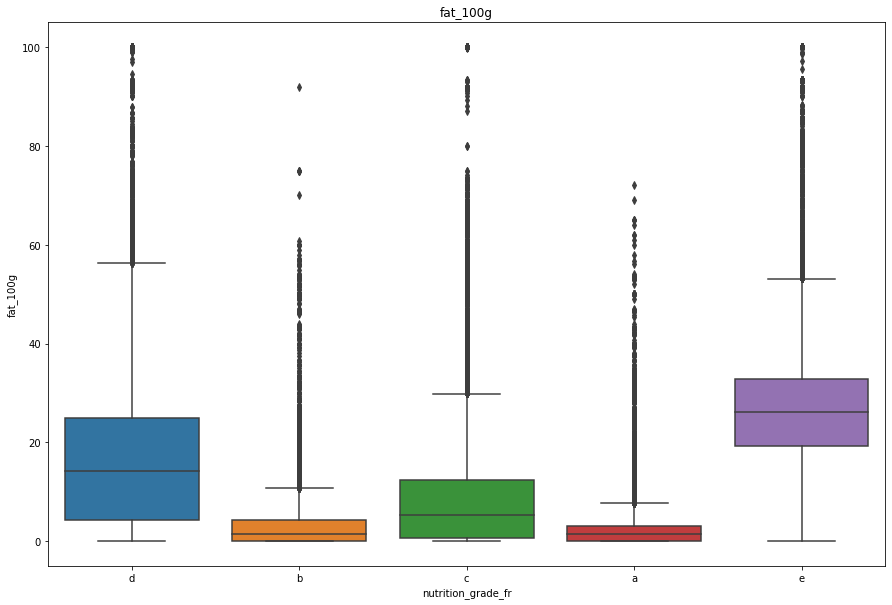

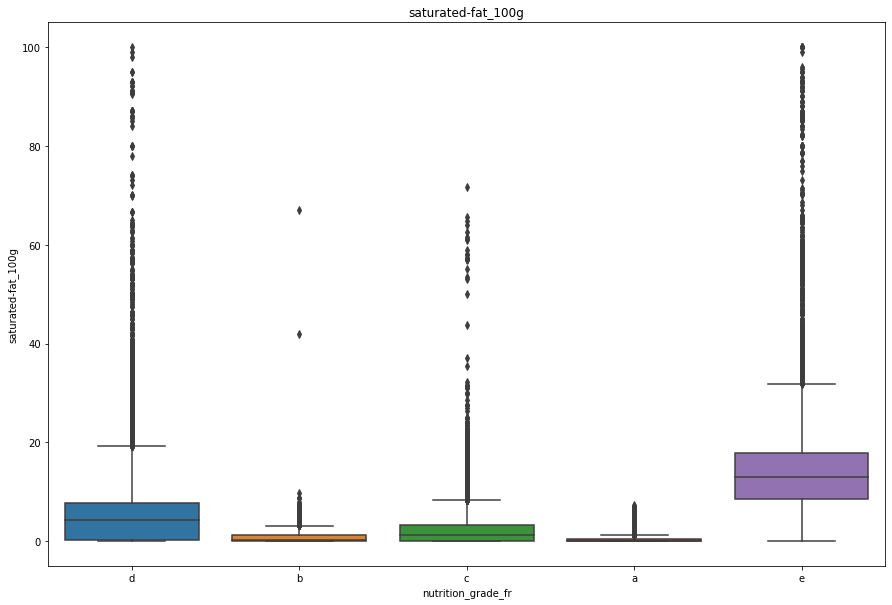

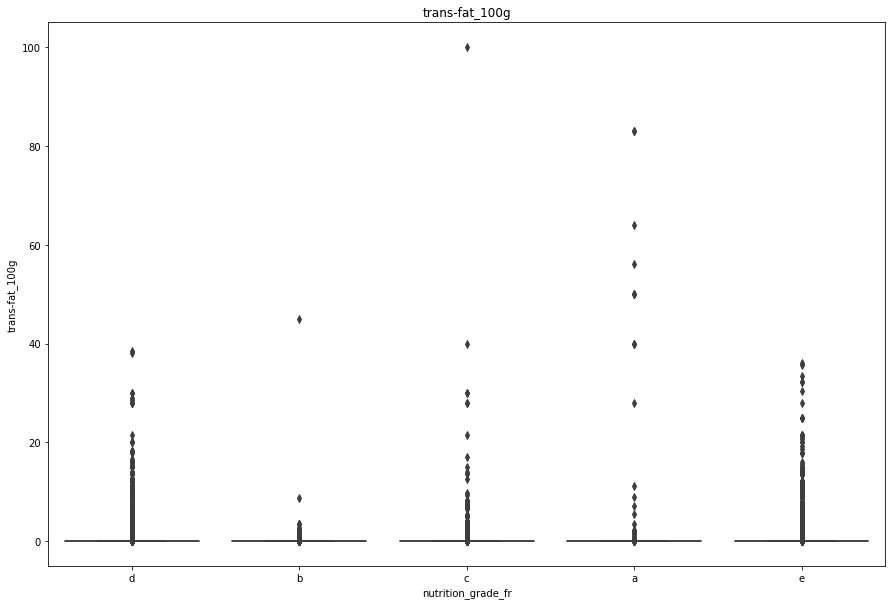

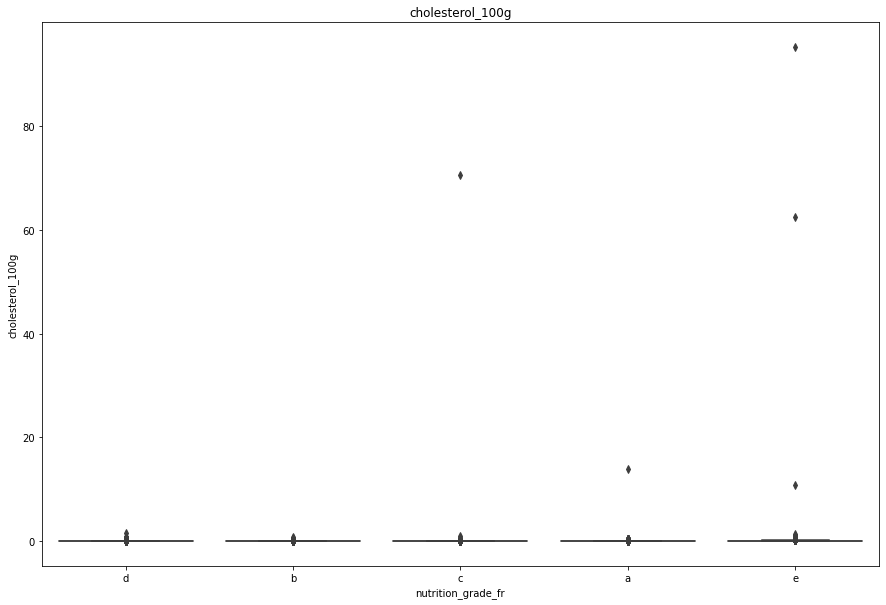

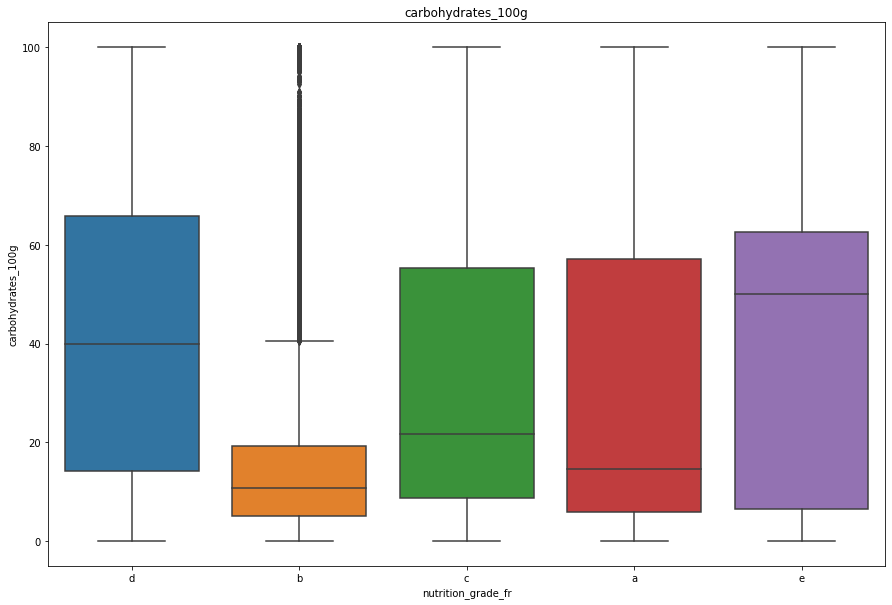

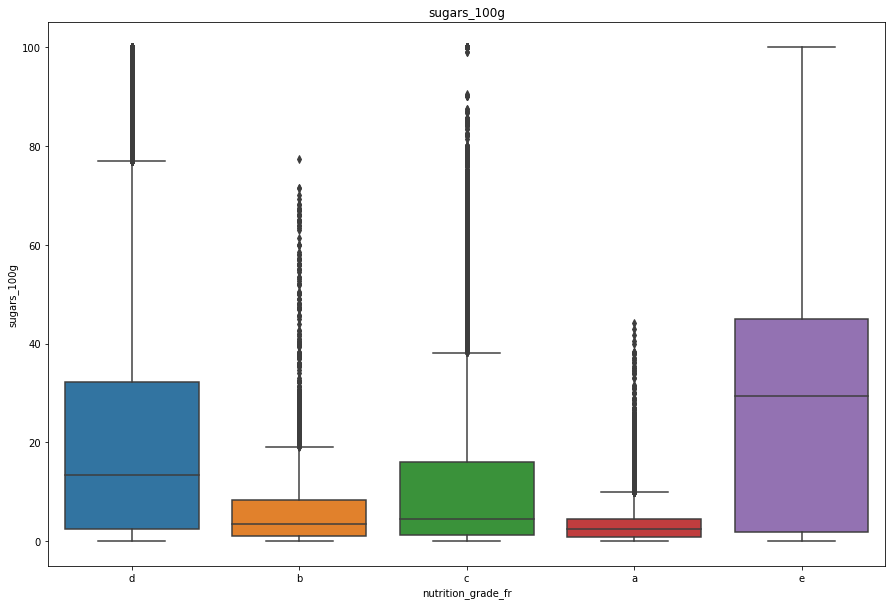

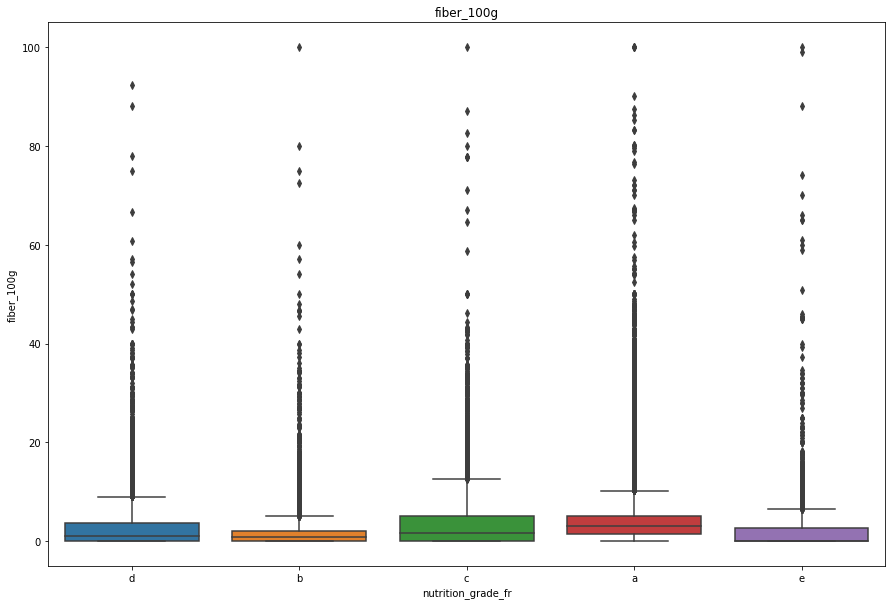

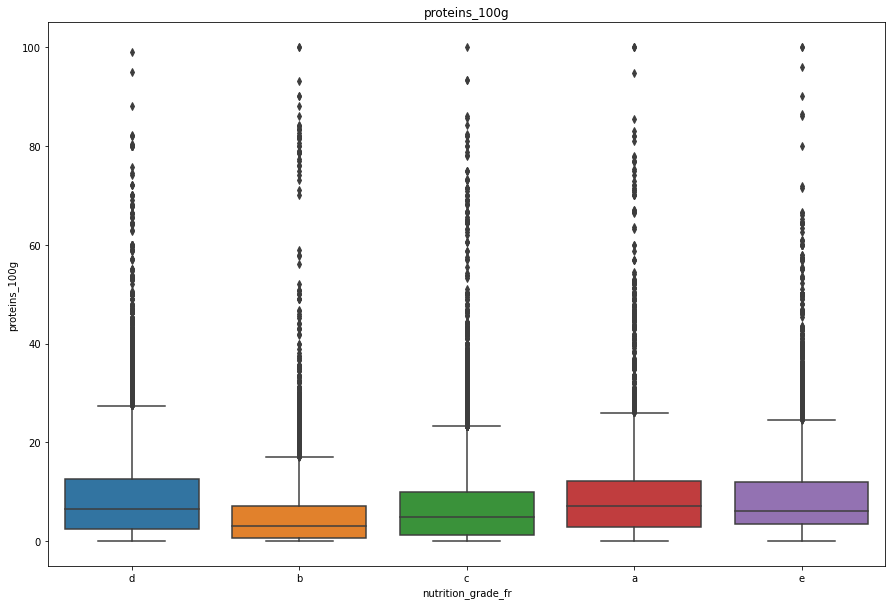

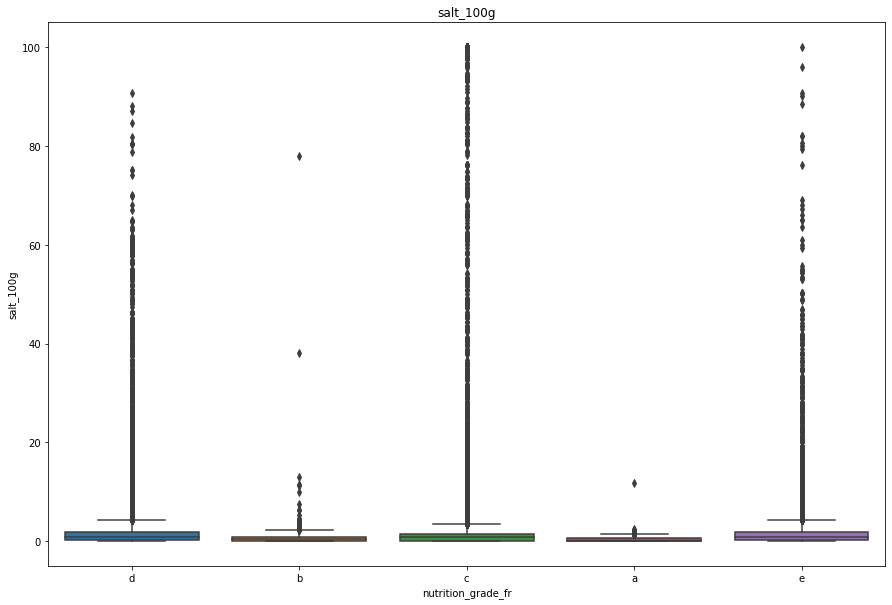

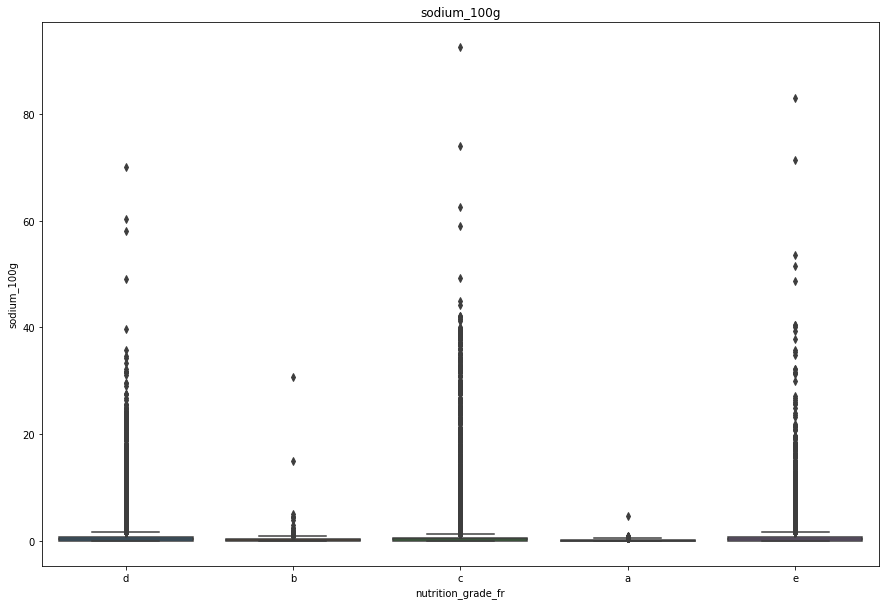

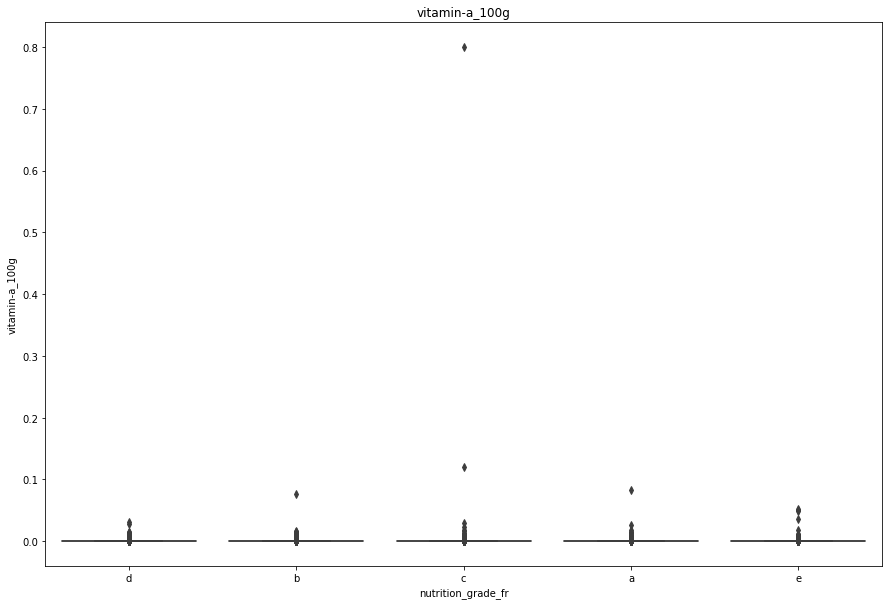

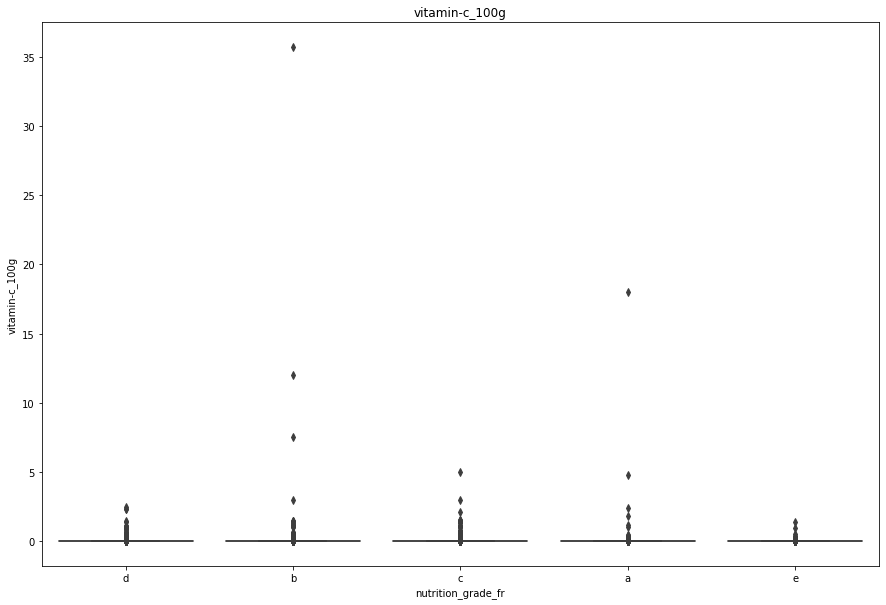

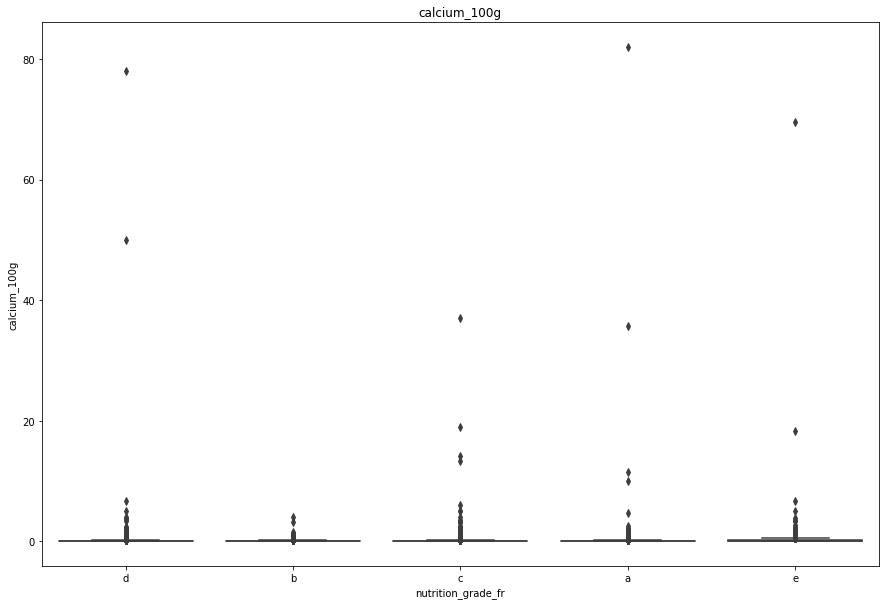

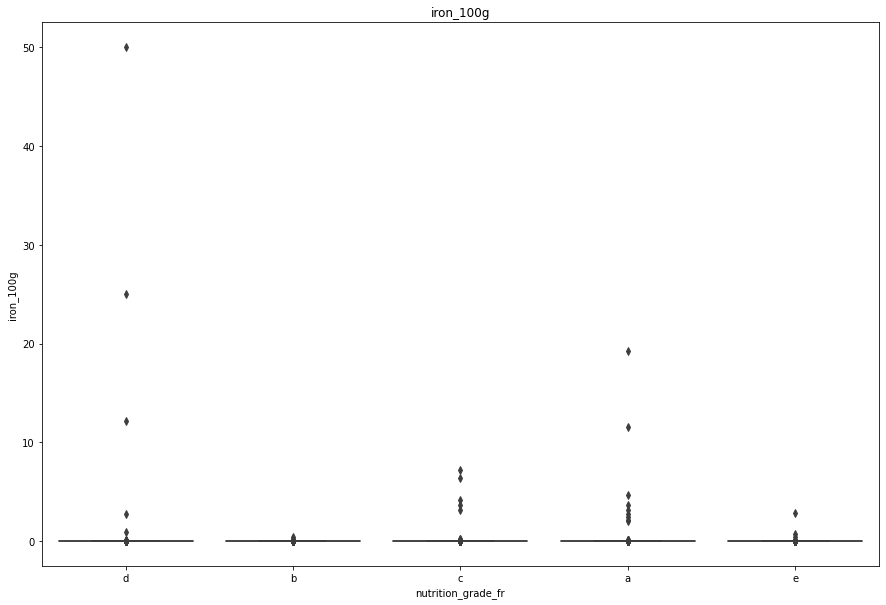

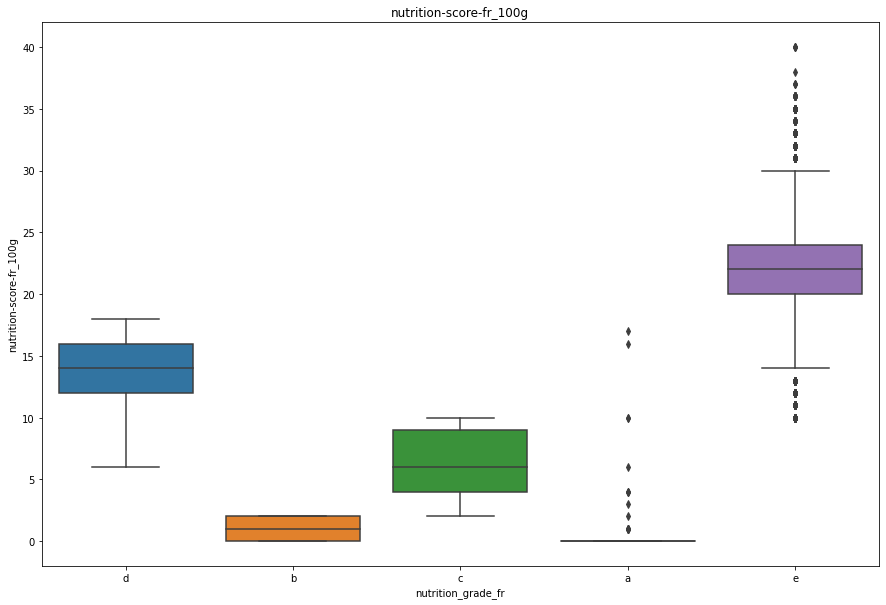

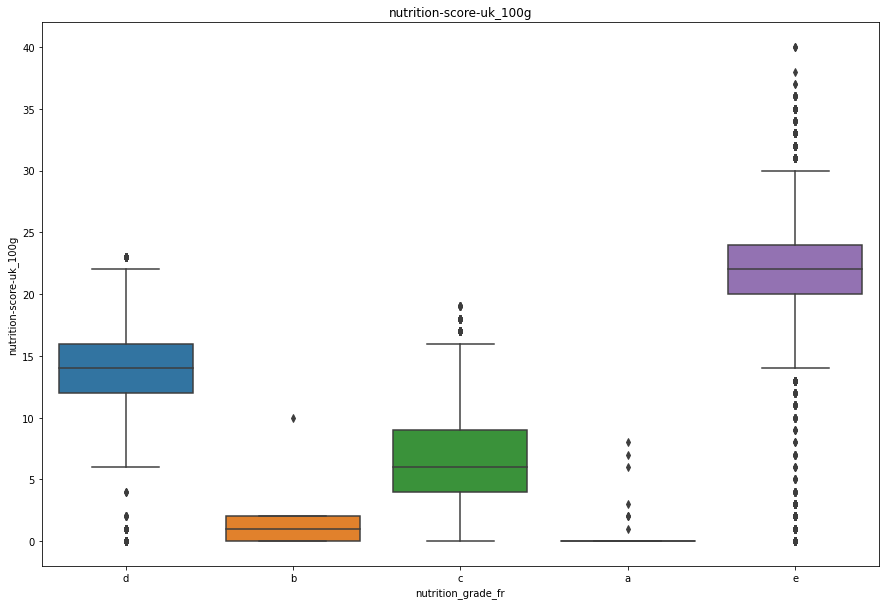

In [30]:
#for colonnes in colonnes_nutrition:
#    plt.figure(figsize=(15,10))
#    sns.boxplot(x='nutrition_grade_fr', y=colonnes,  
#                data=df_data_clean).set_title(colonnes)
#    plt.show()
    
boxplot_nutrition(df_data_clean, colonnes_nutrition, 'nutrition_grade_fr')  
# voir les produits avec les valeurs maximales pour vérifier que ce ne sont pas des erreurs

<span class="girk">La majorité des boxplot ont déjà un meilleur visage...</span> 


## Suppression des produits doublons
Nous avons vu précédemment qu'il y avait des produits en doublon. Nous allons donc garder le plus récent

In [31]:
df_data_clean = df_data_clean.sort_values('created_t').drop_duplicates("product_name", keep = "last")

df_data_clean

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
187478,3017760038409,http://world-fr.openfoodfacts.org/produit/3017...,marianne,0,NaN,1488992055,2017-03-08T16:54:15Z,Lulu la barquette (Fraise),120 g,"Paquet,Carton","paquet,carton",LU,lu,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...","Snacks sucrés,Biscuits et gâteaux,Biscuits,Bar...",NaN,NaN,"France,Ardennes","france,ardennes","Sans colorants,Sans conservateurs","en:no-colorings,en:no-preservatives","Sans colorants,Sans conservateurs",NaN,NaN,NaN,"Courrières,France",Cora,"France,Suisse","en:france,en:switzerland","France,Suisse","Sirop de glucose-fructose, purée de fraises 27...","blé, œufs","Lait,Fruits à coque","en:milk,en:nuts","Lait,Fruits à coque","Un biscuit (6,66g)",2.0,[ sirop-de-glucose-fructose -> fr:sirop-de-gl...,"en:e440,en:e330","E440 - Pectines,E330 - Acide citrique",0.0,NaN,0.0,NaN,d,Sugary snacks,Biscuits and cakes,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:biscuits,Biscuits,http://fr.openfoodfacts.org/images/products/30...,http://fr.openfoodfacts.org/images/products/30...,1480.0,2.1,0.5,NaN,NaN,78.0,60.0,1.2,4.200,0.0800,0.031496,NaN,NaN,NaN,NaN,13.0,13.0
251761,3760029248001,http://world-fr.openfoodfacts.org/produit/3760...,stephane,1328021038,2012-01-31T14:43:58Z,1482511099,2016-12-23T16:38:19Z,Caramels tendres au beurre salé au sel de Guér...,100 g,"Boite,Carton","boite,carton",Carabreizh,carabreizh,"Epicerie,Snacks sucrés,Confiseries,Caramels","en:groceries,en:sugary-snacks,en:confectioneri...","Epicerie,Snacks sucrés,Confiseries,Caramels",NaN,NaN,"France,Bretagne","france,bretagne",Produit en Bretagne,en:produced-in-bretagne,Produit en Bretagne,EMB 56078E,emb-56078e,NaN,"Rennes,France",Carrefour,France,en:france,France,"_Lait_ reconstitué en poudre 26% de MG, sirop ...","Lait, lait, soja",NaN,NaN,NaN,NaN,2.0,[ lait-reconstitue-en-poudre-26-de-mg -> fr:l...,"en:e500,en:e322","E500 - Carbonates de sodium,E322 - Lécithines",0.0,NaN,0.0,NaN,e,Sugary snacks,Sweets,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,Epicerie,http://fr.openfoodfacts.org/images/products/37...,http://fr.openfoodfacts.org/images/products/37...,1717.0,10.9,7.0,NaN,NaN,73.5,49.3,NaN,3.000,1.7000,0.669291,NaN,NaN,NaN,NaN,28.0,28.0
188901,3029330062806,http://world-fr.openfoodfacts.org/produit/3029...,stephane,1328783696,2012-02-09T10:34:56Z,1482511099,2016-12-23T16:38:19Z,Jacquet Les bouchées créatives à garnir,54 g,Boite carton,boite-carton,Jacquet,jacquet,Biscuits apéritifs,"en:salty-snacks,en:appetizers,en:crackers","Snacks salés,Apéritif,Biscuits apéritifs",NaN,NaN,NaN,NaN,Sans huile de palme,en:palm-oil-free,Sans huile de palme,NaN,NaN,NaN,"Angers,France",Géant,France,en:france,France,"Farine de blé, huile de tourneso


Nous pouvons voir ici qu'il y a des lignes complètement fausses. Par exemple, le "creator" est remplacé par la ville, et "last_modified_t" affiche "France" au lieu d'une timestamp.

## Colonnes à garder

In [32]:
colonnes_à_garder = ['created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'categories_fr',
       'countries_fr', 'nutrition_grade_fr', 
       'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr']

colonnes_def = colonnes_à_garder + colonnes_nutrition.tolist()


data_final = df_data_clean[colonnes_def]



data_final

# chercher si un champ numérique est un type numérique. S'il ne l'est pas, probablement pb

,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,categories_fr,countries_fr,nutrition_grade_fr,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
187478,0,NaN,1488992055,2017-03-08T16:54:15Z,Lulu la barquette (Fraise),LU,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bar...","France,Suisse",d,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:biscuits,Biscuits,1480.0,2.1,0.5,NaN,NaN,78.0,60.0,1.2,4.200,0.0800,0.031496,NaN,NaN,NaN,NaN,13.0,13.0
251761,1328021038,2012-01-31T14:43:58Z,1482511099,2016-12-23T16:38:19Z,Caramels tendres au beurre salé au sel de Guér...,Carabreizh,"Epicerie,Snacks sucrés,Confiseries,Caramels",France,e,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,Epicerie,1717.0,10.9,7.0,NaN,NaN,73.5,49.3,NaN,3.000,1.7000,0.669291,NaN,NaN,NaN,NaN,28.0,28.0
188901,1328783696,2012-02-09T10:34:56Z,1482511099,2016-12-23T16:38:19Z,Jacquet Les bouchées créatives à garnir,Jacquet,"Snacks salés,Apéritif,Biscuits apéritifs",France,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:salty-snacks,Snacks salés,1898.0,15.5,1.3,NaN,NaN,68.0,2.0,3.0,8.500,1.7526,0.690000,NaN,NaN,NaN,NaN,9.0,9.0
195704,1328986318,2012-02-11T18:51:58Z,1403887806,2014-06-27T16:50:06Z,Cookies tout chocolat Biocoop,Biocoop,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...",France,e,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:cookies,Cookies,2040.0,25.0,14.0,NaN,NaN,56.0,33.0,5.5,7.000,0.3810,0.150000,NaN,NaN,NaN,NaN,19.0,19.0
302186,1328993181,2012-02-11T20:46:21Z,1490646628,2017-03-27T20:30:28Z,Eau minérale gazeuse,San Pellegrino,"Boissons,Boissons gazeuses,Eaux,Eaux minérales...","Belgique,France,Italie,Suisse",NaN,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:waters,Eaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211769,1492737303,2017-04-21T01:15:03Z,1492737304,2017-04-21T01:15:04Z,NaN,NaN,NaN,Polynésie française,NaN,"en:empty, en:to-be-completed, en:nutrition-fac...","en:empty,en:to-be-completed,en:nutrition-facts...","Vide,A compléter,Informations nutritionnelles ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189404,"Brétigny-sur-Orge,Marseille 5°,France","Auchan,Super U","Suisse,France","en:france,en:switzerland","France,Suisse",NaN,6,en:fruit-yogurts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189068,France,NaN,"Belgique,France","en:belgium,en:france","Belgique,France",NaN,6,en:whole-milk-yogurts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,France,NaN,"Belgique,France, en:switzerland","en:belgium,en:france,en:switzerland","Belgique,France,Suisse",NaN,4,en:whole-milk-yogurts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Erreurs lexicales
On peut voir la présence d'erreurs lexicales, avec des lignes qui ne sont pas bonnes. On va donc les supprimer.


<AxesSubplot:>

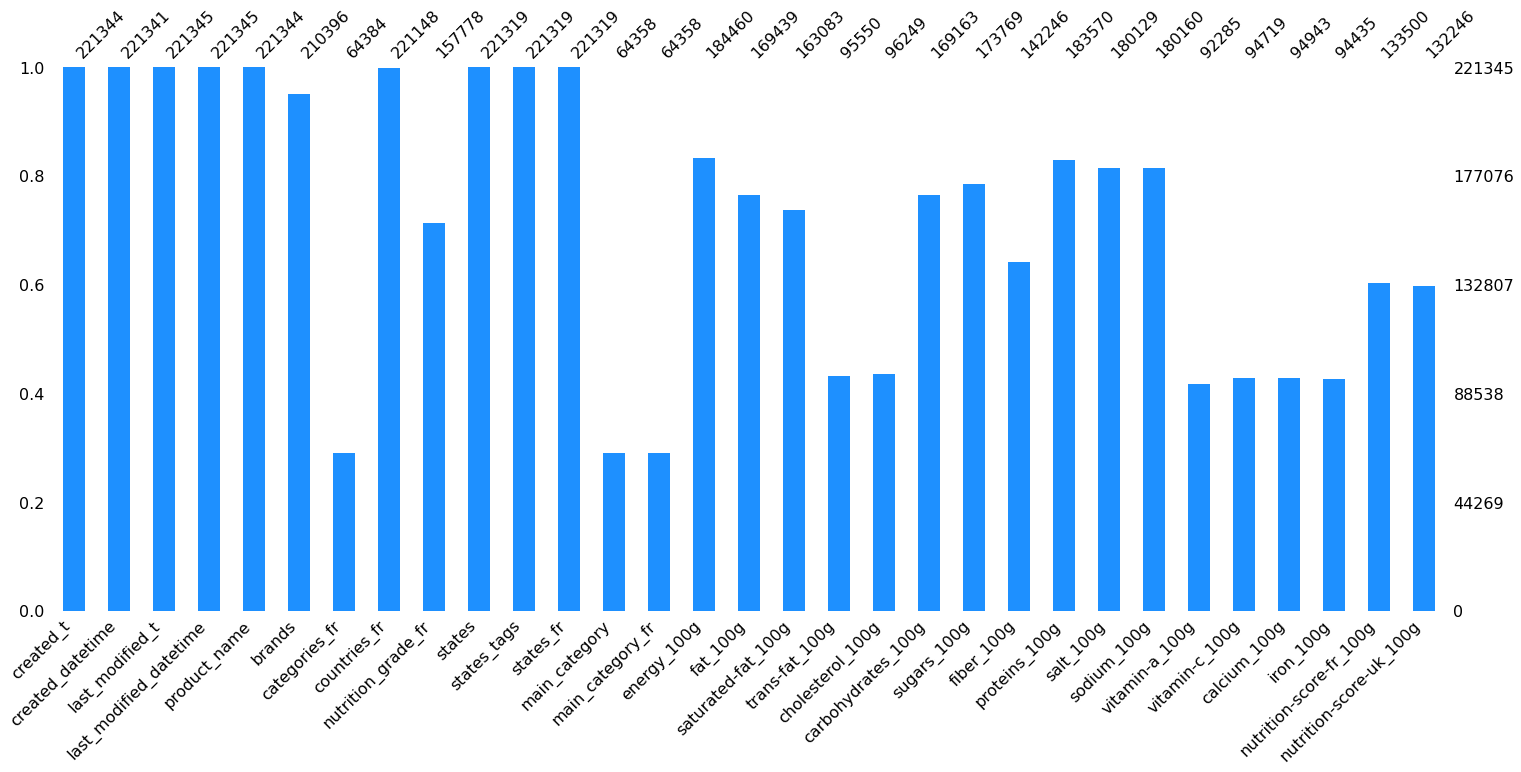

In [33]:
missingno.bar(data_final, color='dodgerblue') 

Il y a des produits qui n'ont ni catégorie, ni nutriscore. On va donc les exclure.


Cela permettra également de supprimer les erreurs lexicales car les lignes fausses que nous avons vu précédemment n'ont aucun des deux.

<AxesSubplot:>

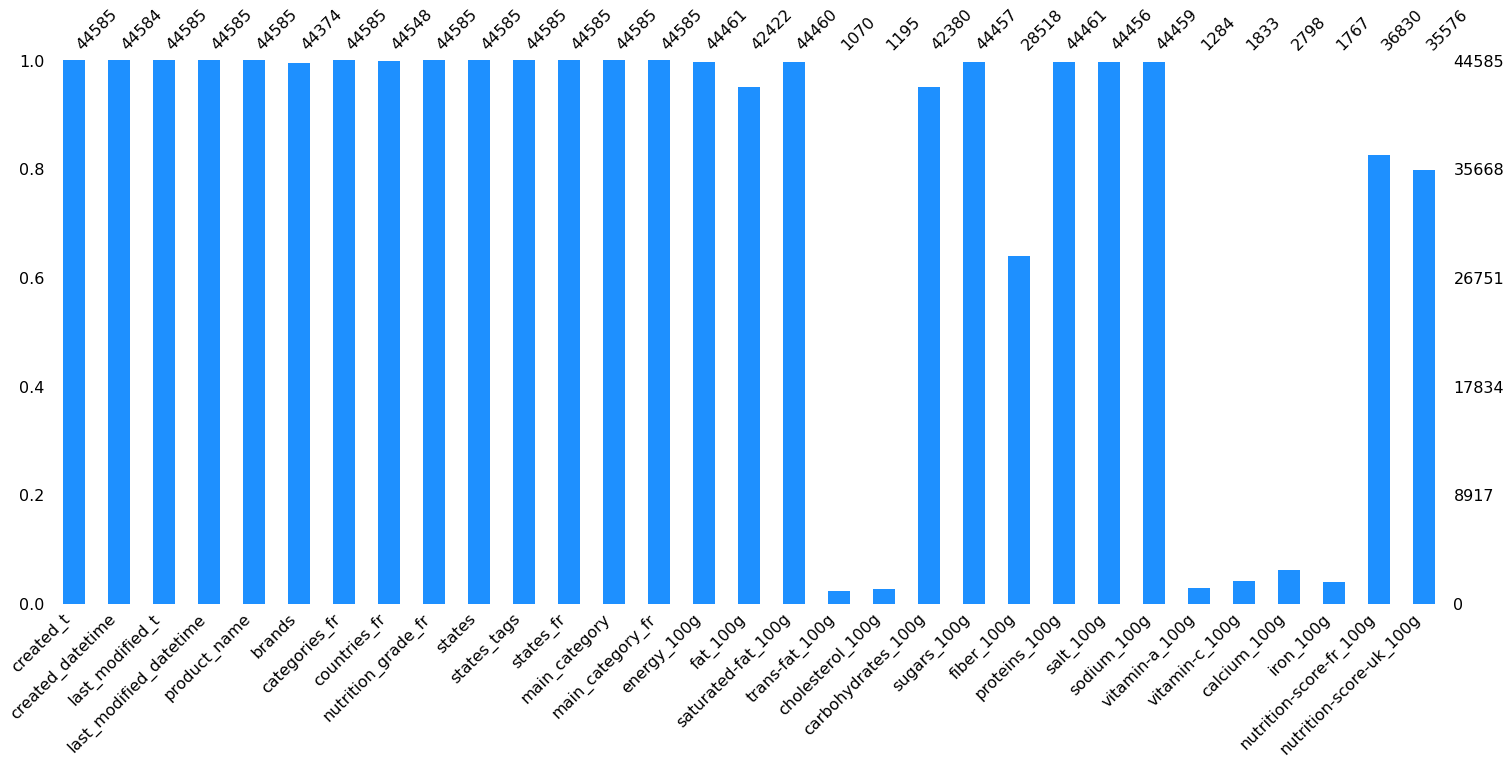

In [34]:
data_final = data_final.dropna(subset=['main_category', 'nutrition_grade_fr'])

missingno.bar(data_final, color='dodgerblue') 

In [35]:
data_final

,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,categories_fr,countries_fr,nutrition_grade_fr,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
187478,0,NaN,1488992055,2017-03-08T16:54:15Z,Lulu la barquette (Fraise),LU,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bar...","France,Suisse",d,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:biscuits,Biscuits,1480.0,2.1,0.5,NaN,NaN,78.0,60.0,1.2,4.2,0.0800,0.031496,NaN,NaN,NaN,NaN,13.0,13.0
251761,1328021038,2012-01-31T14:43:58Z,1482511099,2016-12-23T16:38:19Z,Caramels tendres au beurre salé au sel de Guér...,Carabreizh,"Epicerie,Snacks sucrés,Confiseries,Caramels",France,e,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,Epicerie,1717.0,10.9,7.0,NaN,NaN,73.5,49.3,NaN,3.0,1.7000,0.669291,NaN,NaN,NaN,NaN,28.0,28.0
188901,1328783696,2012-02-09T10:34:56Z,1482511099,2016-12-23T16:38:19Z,Jacquet Les bouchées créatives à garnir,Jacquet,"Snacks salés,Apéritif,Biscuits apéritifs",France,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:salty-snacks,Snacks salés,1898.0,15.5,1.3,NaN,NaN,68.0,2.0,3.0,8.5,1.7526,0.690000,NaN,NaN,NaN,NaN,9.0,9.0
195704,1328986318,2012-02-11T18:51:58Z,1403887806,2014-06-27T16:50:06Z,Cookies tout chocolat Biocoop,Biocoop,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...",France,e,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:cookies,Cookies,2040.0,25.0,14.0,NaN,NaN,56.0,33.0,5.5,7.0,0.3810,0.150000,NaN,NaN,NaN,NaN,19.0,19.0
291384,1329036715,2012-02-12T08:51:55Z,1419995268,2014-12-31T03:07:48Z,SMACZNA ZUPA Grochova,"WINIARY,Nestlé",pl:Soupes-deshydratees,Pologne,c,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",pl:soupes-deshydratees,pl:Soupes-deshydratees,159.0,0.8,0.3,NaN,NaN,5.5,0.4,0.7,1.8,1.0160,0.400000,NaN,NaN,NaN,NaN,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216238,1492713516,2017-04-20T18:38:36Z,1492716489,2017-04-20T19:28:09Z,Ricotta,Franprix,Ricotta,France,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",fr:ricotta,Ricotta,567.0,9.5,6.7,NaN,NaN,4.3,3.8,NaN,8.4,0.3200,0.125984,NaN,NaN,NaN,NaN,3.0,3.0
203279,1492713975,2017-04-20T18:46:15Z,1492716327,2017-04-20T19:25:27Z,Pizza 3 fromages fondants,Sodebo,"Plats préparés,Pizzas tartes salées et quiches...",France,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:meals,Plats préparés,1000.0,8.9,5.3,NaN,NaN,27.0,2.3,NaN,11.0,1.3000,0.511811,NaN,NaN,NaN,NaN,12.0,12.0
307216,1492720277,2017-04-20T20:31:17Z,1492721260,2017-04-20T20:47:40Z,Biscuits Petit-Déjeuner Céréales Complètes San...,Gullon,"Petit-déjeuners,Snacks sucrés,Biscuits et gâte...","France,Espagne",a,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:breakfasts,Petit-déjeuners,1715.0,14.0,1.3,NaN,NaN,65.0,1.4,9.8,6.8,0.6500,0.255906,NaN,NaN,NaN,NaN,NaN,NaN
184023,1492721312,2017-04-20T20:

### Vérification des erreurs lexicales

In [36]:
print(data_final.loc[data_final['last_modified_t'] == 'France'])
print(data_final.loc[data_final['product_name'] == 'France'])


Empty DataFrame
Columns: [created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, brands, categories_fr, countries_fr, nutrition_grade_fr, states, states_tags, states_fr, main_category, main_category_fr, energy_100g, fat_100g, saturated-fat_100g, trans-fat_100g, cholesterol_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, vitamin-a_100g, vitamin-c_100g, calcium_100g, iron_100g, nutrition-score-fr_100g, nutrition-score-uk_100g]
Index: []
Empty DataFrame
Columns: [created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, brands, categories_fr, countries_fr, nutrition_grade_fr, states, states_tags, states_fr, main_category, main_category_fr, energy_100g, fat_100g, saturated-fat_100g, trans-fat_100g, cholesterol_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, vitamin-a_100g, vitamin-c_100g, calcium_100g, iron_100g, nutrition-score-fr_100g, nutrition-score

<span class="girk">Elles ont été supprimées</span>

## Les valeurs manquantes

### Suppression des colonnes avec trop de données manquantes
On peut voir dans le 5.5 qu'il y a des variables avec très peu de données. Selon moi, il y a trop de valeurs à remplir pour certaines variables, pour que ce soit pertinent ET conforme à la réalité. 

In [37]:
data_final = supprimer_variables_peu_utilisables(data_final, 0.85)



La colonne trans-fat_100g , avec 97.6000897162723 % de données manquantes de la Dataframe est supprimée
La colonne cholesterol_100g , avec 97.31972636536952 % de données manquantes de la Dataframe est supprimée
La colonne vitamin-a_100g , avec 97.12010765952674 % de données manquantes de la Dataframe est supprimée
La colonne vitamin-c_100g , avec 95.88875182236178 % de données manquantes de la Dataframe est supprimée
La colonne calcium_100g , avec 93.7243467533924 % de données manquantes de la Dataframe est supprimée
La colonne iron_100g , avec 96.03678367163845 % de données manquantes de la Dataframe est supprimée


In [38]:
data_final.head()

,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,categories_fr,countries_fr,nutrition_grade_fr,states,states_tags,states_fr,main_category,main_category_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
187478,0,NaN,1488992055,2017-03-08T16:54:15Z,Lulu la barquette (Fraise),LU,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bar...","France,Suisse",d,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:biscuits,Biscuits,1480.0,2.1,0.5,78.0,60.0,1.2,4.2,0.0800,0.031496,13.0,13.0
251761,1328021038,2012-01-31T14:43:58Z,1482511099,2016-12-23T16:38:19Z,Caramels tendres au beurre salé au sel de Guér...,Carabreizh,"Epicerie,Snacks sucrés,Confiseries,Caramels",France,e,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,Epicerie,1717.0,10.9,7.0,73.5,49.3,NaN,3.0,1.7000,0.669291,28.0,28.0
188901,1328783696,2012-02-09T10:34:56Z,1482511099,2016-12-23T16:38:19Z,Jacquet Les bouchées créatives à garnir,Jacquet,"Snacks salés,Apéritif,Biscuits apéritifs",France,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",en:salty-snacks,Snacks salés,1898.0,15.5,1.3,68.0,2.0,3.0,8.5,1.7526,0.690000,9.0,9.0
195704,1328986318,2012-02-11T18:51:58Z,1403887806,2014-06-27T16:50:06Z,Cookies tout chocolat Biocoop,Biocoop,"Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...",France,e,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:cookies,Cookies,2040.0,25.0,14.0,56.0,33.0,5.5,7.0,0.3810,0.150000,19.0,19.0
291384,1329036715,2012-02-12T08:51:55Z,1419995268,2014-12-31T03:07:48Z,SMACZNA ZUPA Grochova,"WINIARY,Nestlé",pl:Soupes-deshydratees,Pologne,c,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",pl:soupes-deshydratees,pl:Soupes-deshydratees,159.0,0.8,0.3,5.5,0.4,0.7,1.8,1.0160,0.400000,3.0,3.0


<AxesSubplot:>

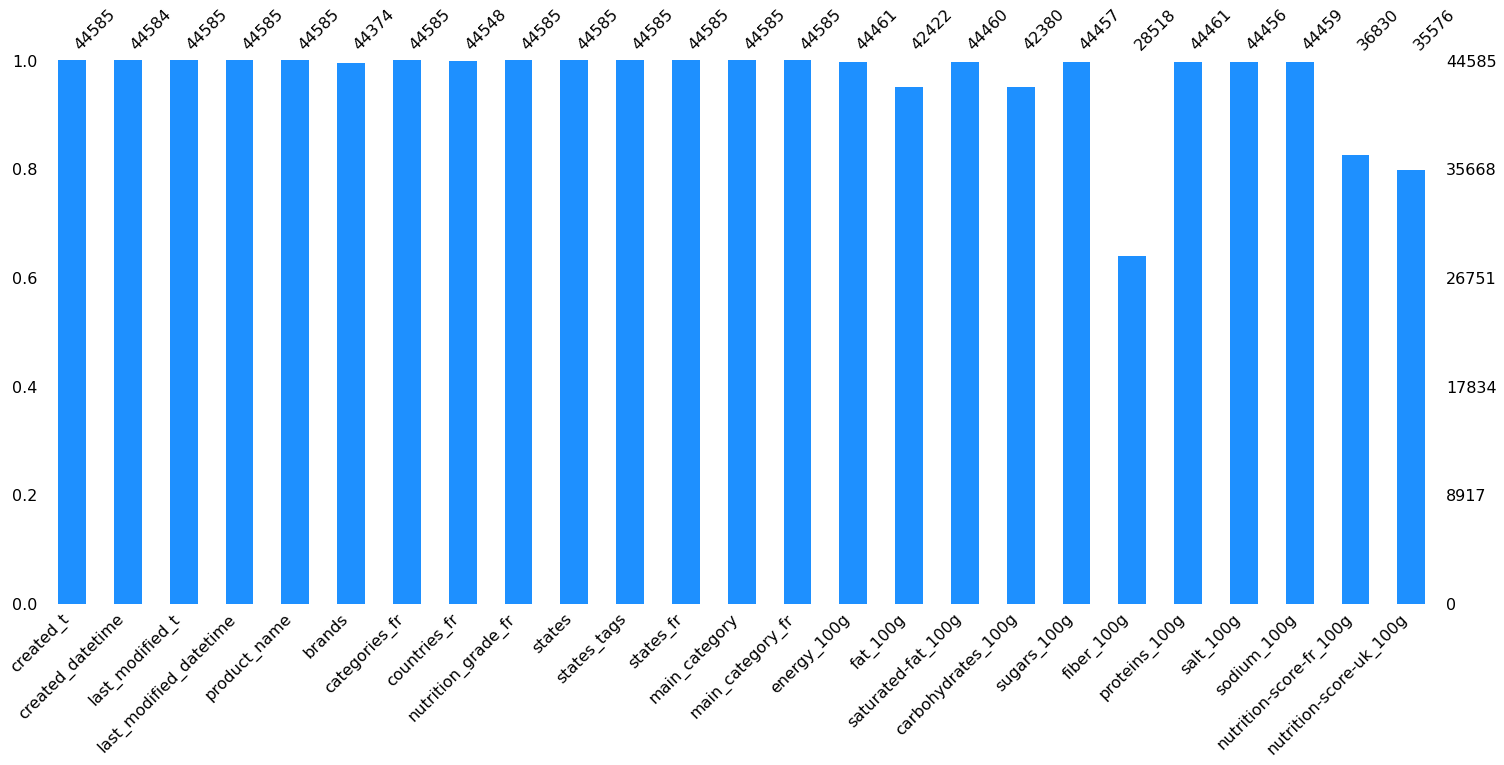

In [39]:
missingno.bar(data_final, color='dodgerblue')

# Sauvegarde de la data clean

In [40]:
data_final.to_csv('./data_final.csv', index=False)